In [1]:
#importing dependencies
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils import resample
from collections import Counter
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor




from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV as gs
from sklearn.model_selection import RandomizedSearchCV as rs

import pickle

In [2]:
#collecting the dataset
flight_train=pd.read_excel('Data_Train.xlsx')
flight_test=pd.read_excel('Test_set.xlsx')

In [3]:
flight_train.shape

(10683, 11)

size of the dataset is large

In [4]:
flight_test.shape

(2671, 10)

In [5]:
flight_train.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


Price is the target variable remaining all are feature variables

In [6]:
flight_train.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

The numerical data show us the total number of unique elements in each column of the dataset

In [7]:
#looking for null values
flight_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Route and Total_Stops contains one each null value

In [8]:
#dropping null values
flight_train.dropna(subset=['Route','Total_Stops'], inplace=True)
flight_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
flight_train.shape

(10682, 11)

In [10]:
#splitting Date_of_Journey into 3 seperate columns i.e day month and year inorder to decrease the unqiueness of the data in the
#particular column
flight_train[["day", "month", "year"]] = flight_train["Date_of_Journey"].str.split("/", expand = True)
print("\nNew DataFrame:")
flight_train.head(10)


New DataFrame:


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,06,2019
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,03,2019
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,01,03,2019
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,03,2019
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625,27,05,2019


In [11]:
flight_train['month'].value_counts()

05    3465
06    3414
03    2724
04    1079
Name: month, dtype: int64

In [12]:
flight_train['day'].value_counts()

9     1304
6     1192
27    1130
21    1111
24    1052
15     984
12     957
1      923
18     832
3      751
01     152
09     102
03      97
06      95
Name: day, dtype: int64

In [13]:
flight_train['Route'].nunique()

128

In [14]:
#splitting Duration column into hours and minutes inorder to decrease the unqiueness of the data in the
#particular column
flight_train[["hours", "minutes"]] = flight_train["Duration"].str.split("h", expand = True)
print("\nNew DataFrame:")
flight_train.head(6)


New DataFrame:


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,hours,minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,2,50m
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,7,25m
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,19,
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,5,25m
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,4,45m
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,06,2019,2,25m


In [15]:
# fetchning count of each unique element in the dataset of each column
for i in flight_train:
    print(flight_train[i].value_counts(),'\n\n')

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64 


18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    1

In [16]:
flight_train['Dep_Time'].dtypes

dtype('O')

In [17]:
#splitting departure time to period of the day and minutes inorder to decrease the unqiueness of the data in the
#particular column
flight_train[["period of the day", "period of the day in minutes"]] = flight_train["Dep_Time"].str.split(":", expand = True)
print("\nNew DataFrame:")
flight_train.head(6)


New DataFrame:


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,hours,minutes,period of the day,period of the day in minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,2,50m,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,7,25m,05,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,19,,09,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,5,25m,18,05
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,4,45m,16,50
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,06,2019,2,25m,09,00


In [18]:
flight_train['hours'].value_counts()

2     2402
1      621
3      501
7      487
5      481
9      445
12     428
8      424
13     407
11     365
10     355
6      340
14     337
15     268
23     264
26     241
16     234
4      222
22     218
24     197
21     196
25     186
27     179
20     162
18     141
19     134
17     129
28      94
29      65
30      49
38      34
37      17
33      13
32       9
34       8
35       7
36       7
31       6
47       2
42       2
39       2
5m       1
41       1
40       1
Name: hours, dtype: int64

there is expection of 5m in the above, and there can't be flight time of 5m 

In [19]:
#replacing 5m with 1 considering it as 1 hour
flight_train['hours'].replace('5m','1',inplace=True)

In [20]:
flight_train['hours'].value_counts()

2     2402
1      622
3      501
7      487
5      481
9      445
12     428
8      424
13     407
11     365
10     355
6      340
14     337
15     268
23     264
26     241
16     234
4      222
22     218
24     197
21     196
25     186
27     179
20     162
18     141
19     134
17     129
28      94
29      65
30      49
38      34
37      17
33      13
32       9
34       8
36       7
35       7
31       6
47       2
42       2
39       2
41       1
40       1
Name: hours, dtype: int64

In [21]:
flight_train['minutes'].value_counts()

 30m    1446
        1031
 20m     997
 50m     972
 35m     939
 55m     910
 15m     903
 45m     896
 25m     803
 40m     636
 5m      623
 10m     525
Name: minutes, dtype: int64

there are 1031 values without any name as the number of minutes is zero replace them as zeros 

In [22]:
flight_train['minutes'].replace('',' 0m',inplace=True)

In [23]:
flight_train['minutes'].value_counts()

 30m    1446
 0m     1031
 20m     997
 50m     972
 35m     939
 55m     910
 15m     903
 45m     896
 25m     803
 40m     636
 5m      623
 10m     525
Name: minutes, dtype: int64

In [24]:
flight_train["minutes"]

0         50m
1         25m
2          0m
3         25m
4         45m
         ... 
10678     30m
10679     35m
10680      0m
10681     40m
10682     20m
Name: minutes, Length: 10682, dtype: object

In [25]:
flight_train.dropna(subset=['minutes'], inplace=True)

In [26]:
flight_train.isnull().sum()

Airline                         0
Date_of_Journey                 0
Source                          0
Destination                     0
Route                           0
Dep_Time                        0
Arrival_Time                    0
Duration                        0
Total_Stops                     0
Additional_Info                 0
Price                           0
day                             0
month                           0
year                            0
hours                           0
minutes                         0
period of the day               0
period of the day in minutes    0
dtype: int64

In [27]:
flight_train.dtypes

Airline                         object
Date_of_Journey                 object
Source                          object
Destination                     object
Route                           object
Dep_Time                        object
Arrival_Time                    object
Duration                        object
Total_Stops                     object
Additional_Info                 object
Price                            int64
day                             object
month                           object
year                            object
hours                           object
minutes                         object
period of the day               object
period of the day in minutes    object
dtype: object

except for price all other columns are object type

In [28]:
#dropping m from every element of minutes columns to convert it to numeric data
flight_train["minutes"]= flight_train["minutes"].str[:-1]

In [29]:
flight_train["minutes"].value_counts()

 30    1446
 0     1031
 20     997
 50     972
 35     939
 55     910
 15     903
 45     896
 25     803
 40     636
 5      623
 10     525
Name: minutes, dtype: int64

In [30]:
#converting to numeric data
flight_train["hours"]=pd.to_numeric(flight_train["hours"])
flight_train["minutes"]=pd.to_numeric(flight_train["minutes"])
flight_train.dtypes

Airline                         object
Date_of_Journey                 object
Source                          object
Destination                     object
Route                           object
Dep_Time                        object
Arrival_Time                    object
Duration                        object
Total_Stops                     object
Additional_Info                 object
Price                            int64
day                             object
month                           object
year                            object
hours                            int64
minutes                          int64
period of the day               object
period of the day in minutes    object
dtype: object

In [31]:
#converting hours data into minutes in order to sum it up with minutes data
flight_train["hours"]=60*flight_train["hours"]
flight_train["hours"].value_counts()

120     2402
60       621
180      501
420      487
300      481
540      445
720      428
480      424
780      407
660      365
600      355
360      340
840      337
900      268
1380     264
1560     241
960      234
240      222
1320     218
1440     197
1260     196
1500     186
1620     179
1200     162
1080     141
1140     134
1020     129
1680      94
1740      65
1800      49
2280      34
2220      17
1980      13
1920       9
2040       8
2160       7
2100       7
1860       6
2820       2
2520       2
2340       2
2460       1
2400       1
Name: hours, dtype: int64

In [32]:
flight_train["period of the day"]=pd.to_numeric(flight_train["period of the day"])
flight_train["period of the day in minutes"]=pd.to_numeric(flight_train["period of the day in minutes"])
flight_train["period of the day"]=60*flight_train["period of the day"]
peakness=flight_train["period of the day"]+flight_train["period of the day in minutes"]
flight_train['peak hour']=peakness

summing up period of the day and period the day in minutes that was extracted from Departure time to divide this category into peakness of the travel as in india there are peak hours for air travel 

In [33]:
#summing up hours and minutes to get total time in flight duration in minutes
time=flight_train["hours"]+flight_train["minutes"]
flight_train['flight time']=time
flight_train.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,hours,minutes,period of the day,period of the day in minutes,peak hour,flight time
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,120,50,1320,20,1340,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,420,25,300,50,350,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,1140,0,540,25,565,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,300,25,1080,5,1085,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,240,45,960,50,1010,285


In [34]:
flight_train['Additional_Info'].replace('No Info','No info',inplace=True)

Additional info column has No Info and No info which are one and the same so replacing No Info with No info

In [35]:
flight_train['Additional_Info'].value_counts()

No info                         8346
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [36]:
flight_train.drop(columns=['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','year','hours','minutes','period of the day','period of the day in minutes'],inplace=True)

Dropping Columns:
1. Data of journey is being dropped because we have subdivied it day and month , also removing year as whole data is of year 2019
2. Route doesn't carry much of a significance as source and destination is what it matter.
3. Dep_time time have been subdivided and Arrival_time doesn't effect the ticket cost.
4. Duration, minutes, hours are dropped as they are converted to flight time.
5. period of the day and period of the day in minutes are converted to peak hour and dropped

In [37]:
flight_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,day,month,peak hour,flight time
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,03,1340,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,05,350,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,06,565,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,05,1085,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,01,03,1010,285


In [38]:
flight_train['peak hour'].value_counts()

1135    233
1020    227
425     205
600     203
430     202
       ... 
985       1
95        1
1295      1
255       1
180       1
Name: peak hour, Length: 222, dtype: int64

In [39]:
flight_train.shape

(10681, 10)

In India the peak hour are as follows:
1. morning 6am to 8:30am
2. morning 10:30am to 12pm
3. evening 4pm to 6pm 
4. evening 7pm to 9:30pm
5.So converting them into minutes in 24hours based and substituting peak hours with 1 and non peak with 0 to indicate if the departure is at the peak hour time

In [40]:
flight_train.loc[flight_train['peak hour'].between(0,359), 'peak hour'] = 0
flight_train.loc[flight_train['peak hour'].between(360,510), 'peak hour'] = 1
flight_train.loc[flight_train['peak hour'].between(511,629), 'peak hour'] = 0
flight_train.loc[flight_train['peak hour'].between(630,720), 'peak hour'] = 1
flight_train.loc[flight_train['peak hour'].between(721,959), 'peak hour'] = 0
flight_train.loc[flight_train['peak hour'].between(960,1080), 'peak hour'] = 1
flight_train.loc[flight_train['peak hour'].between(1081,1139), 'peak hour'] = 0
flight_train.loc[flight_train['peak hour'].between(1140,1290), 'peak hour'] = 1
flight_train.loc[flight_train['peak hour'].between(1291,1439), 'peak hour'] = 0

In [41]:
flight_train['peak hour'].value_counts()

1    5682
0    4999
Name: peak hour, dtype: int64

In India Air Travel rate are based on Sections that is based based on flight duration:
1. Section I: duration less than 40 minutes
2. Section II: duration between 40-60 minutes
3. Section III: duration between 60-90 minutes
4. Section IV: duration between 90-120 minutes
5. Section V: duration between 120-150 minutes
6. Section VI: duration between 150-180 minutes
7. Section VII: duration above 180 minutes
8.Replacing the flight time according with 0-6 numbers

In [42]:
flight_train.loc[flight_train['flight time'] < 40, 'flight time'] = 0
flight_train.loc[flight_train['flight time'].between(40,60), 'flight time'] = 1
flight_train.loc[flight_train['flight time'].between(61,90), 'flight time'] = 2
flight_train.loc[flight_train['flight time'].between(91,120), 'flight time'] = 3
flight_train.loc[flight_train['flight time'].between(121,150), 'flight time'] = 4
flight_train.loc[flight_train['flight time'].between(151,180), 'flight time'] = 5
flight_train.loc[flight_train['flight time'] > 181, 'flight time'] = 6

In [43]:
flight_train['flight time'].value_counts()

6    7397
5    1972
4     691
2     606
3      15
Name: flight time, dtype: int64

In [44]:
plot_set=flight_train.drop(columns=['Price'])

Airline


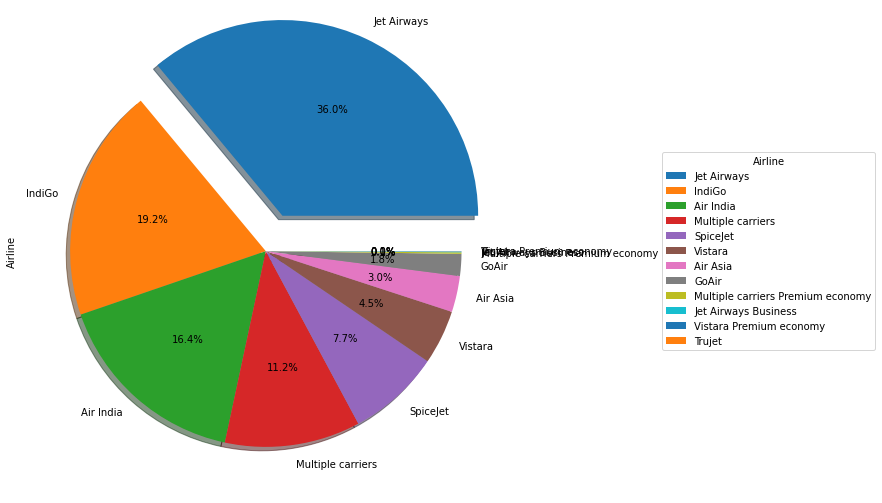




Source


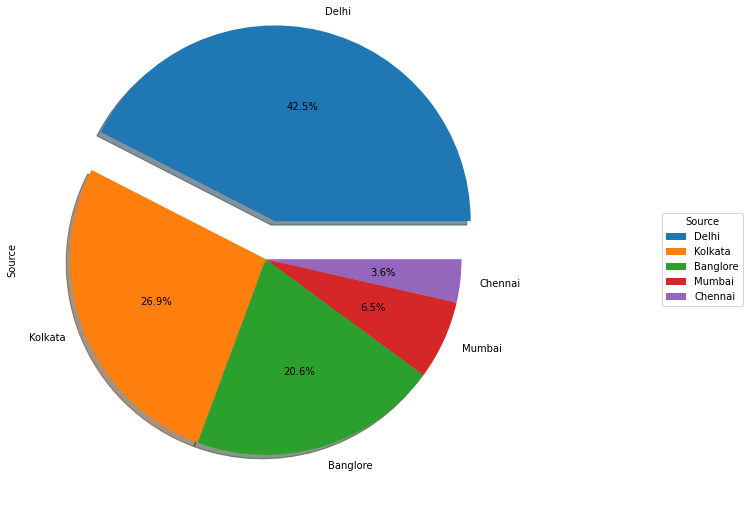




Destination


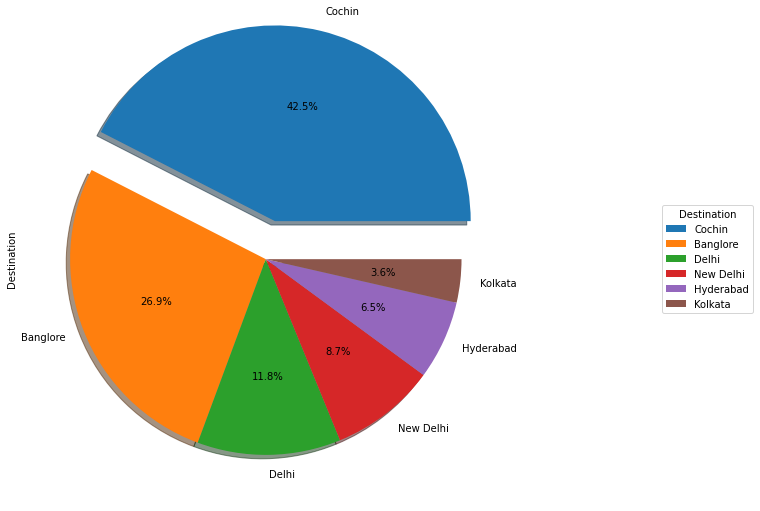




Total_Stops


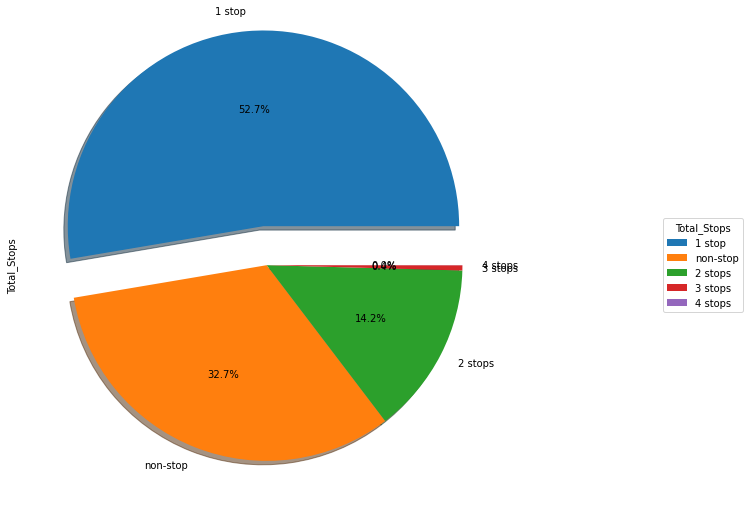




Additional_Info


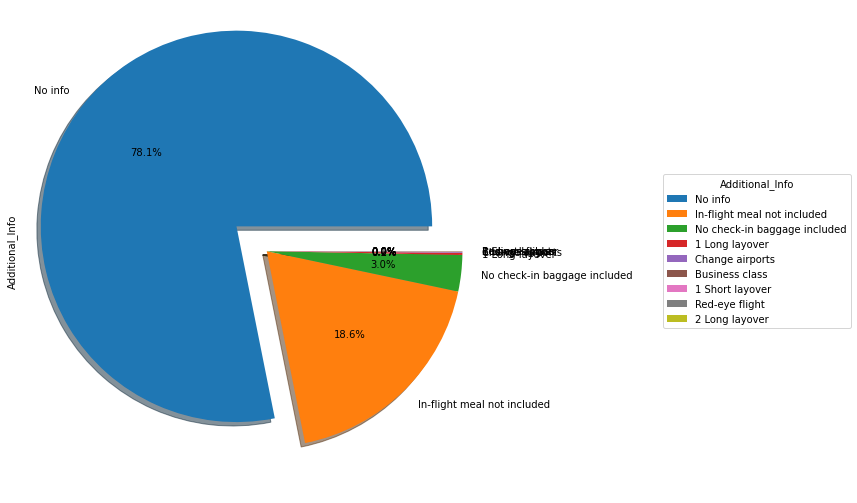




day


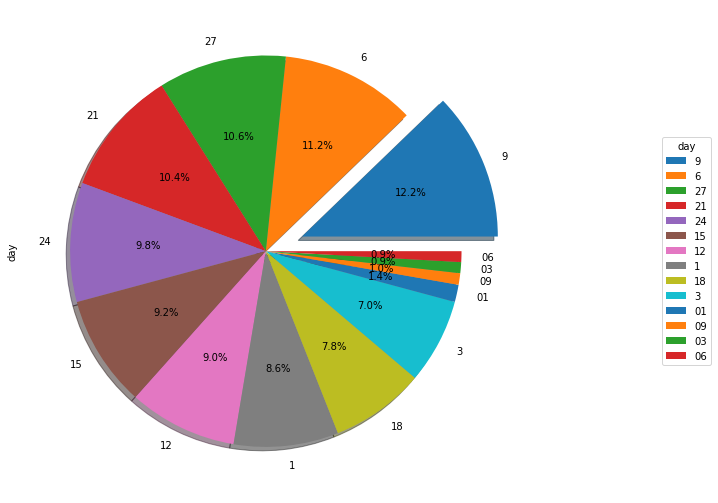




month


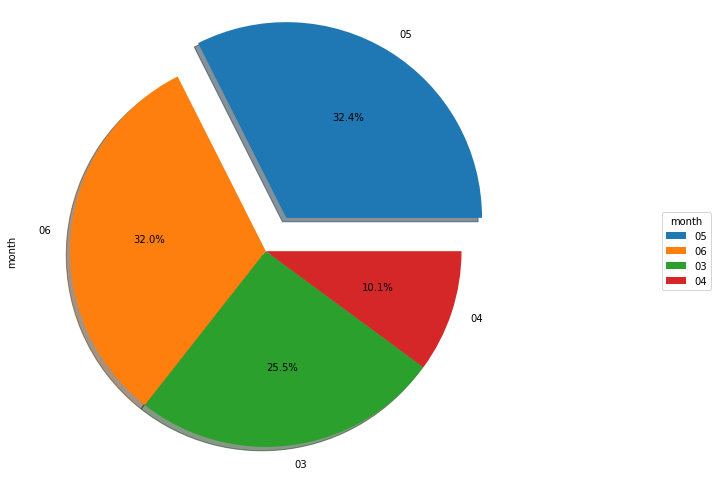




peak hour


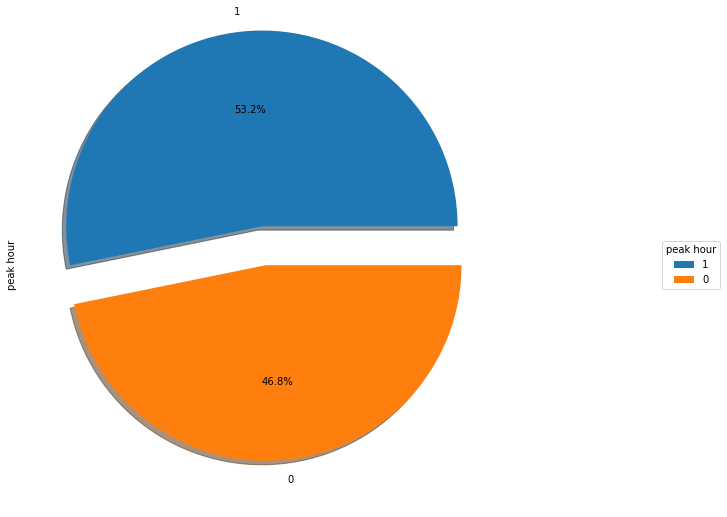




flight time


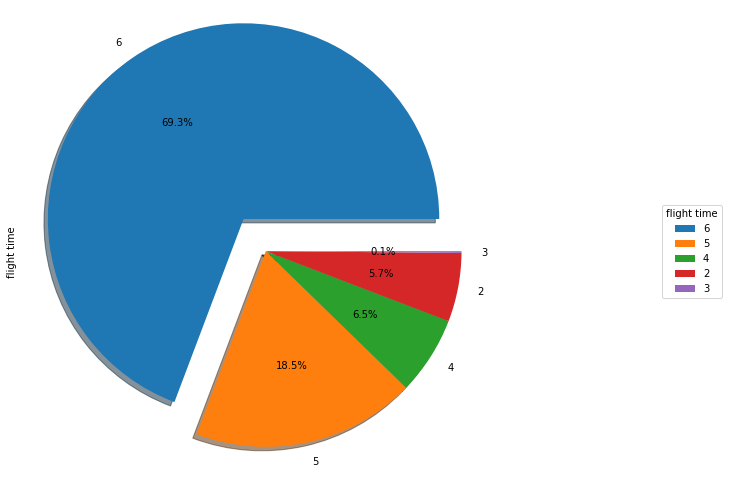

In [45]:
# pie chart for feature variables
for i in plot_set:
    print('\033[1m'+i+'\033[1m')
    y=plot_set[i].value_counts()
    exp=[0.2]
    j=int(plot_set[i].nunique())
    k=1
    while k < j:
        exp.append(0)
        k+=1
    z=y.plot.pie(figsize=(9,9),explode=exp, autopct='%2.1f%%', shadow=True)
    z.legend(title =i,loc ="center left",bbox_to_anchor =(1.3, 0, 0.5, 1))
    plt.show()
    print('\n\n')

Univariate Analysis:
1. Most Passengers are preferring Jet Airways to travel
2. Maximum Passengers are departing from Delhi and Chennai has the least
3. Majority are travelling to Cochin city and Kolkata has least visitors to the city
4. Majority of the passengers have No info in additional travel info
5. Most Travellers are travelling on 9th day of the month
6. May and June month as maximum passengers travelling
7. passenger travelling in peak and non peak hour is almost balanced
8. Most passengers flight duration is above 180 minutes 

**Bi Variate Analysis

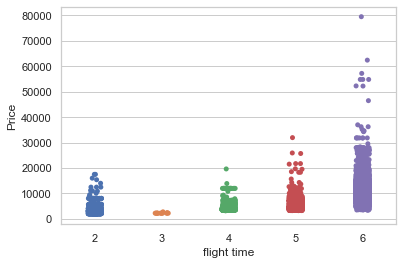

In [46]:
sns.set(style = 'whitegrid')         
sns.stripplot(x="flight time", y="Price", data=flight_train)  
plt.show()

Price for air travel over 180 cost more 

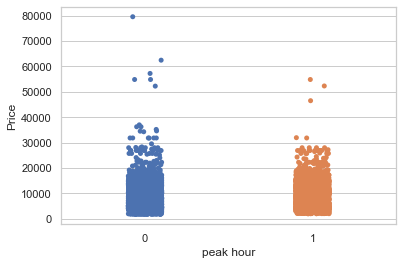

In [47]:
sns.set(style = 'whitegrid')         
sns.stripplot(x="peak hour", y="Price", data=flight_train)  
plt.show()

peakness is hardly effect the price

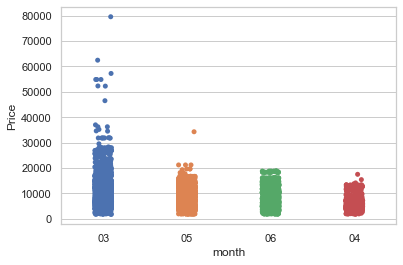

In [48]:
sns.set(style = 'whitegrid')         
sns.stripplot(x="month", y="Price", data=flight_train)  
plt.show()

March month is most expensive time to air Travel were as April is cheaper

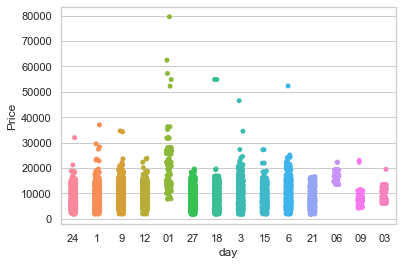

In [49]:
sns.set(style = 'whitegrid')         
sns.stripplot(x="day", y="Price", data=flight_train)  
plt.show()

Basic price of 6th day of the month air travel is expensive than any other day 

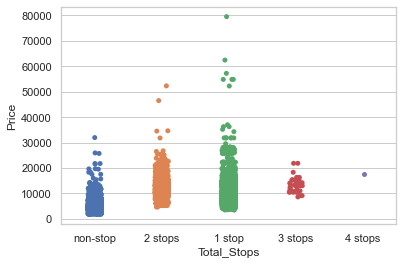

In [50]:
sns.set(style = 'whitegrid')         
sns.stripplot(x="Total_Stops", y="Price", data=flight_train)  
plt.show()

Non-stop flights are affortable 

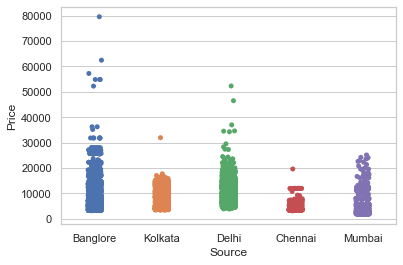

In [51]:
sns.set(style = 'whitegrid')         
sns.stripplot(x="Source", y="Price", data=flight_train)  
plt.show()

Air travel from chennai is cheaper compared to all other city

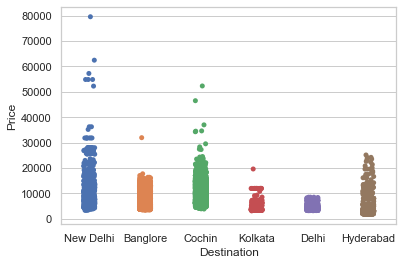

In [52]:
sns.set(style = 'whitegrid')         
sns.stripplot(x="Destination", y="Price", data=flight_train)  
plt.show()

Passenger travelling to Kolkata are travelling at an affortable price 

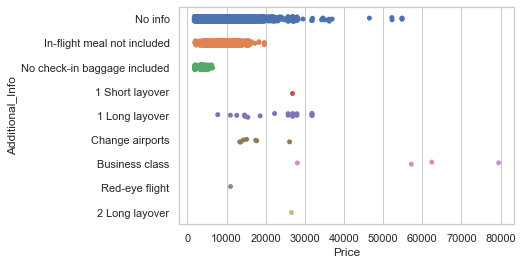

In [53]:
sns.set(style = 'whitegrid')         
sns.stripplot(y="Additional_Info" ,x="Price", data=flight_train)  
plt.show()

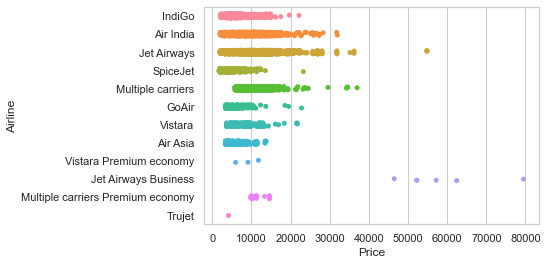

In [54]:
sns.set(style = 'whitegrid')         
sns.stripplot(x="Price" ,y="Airline", data=flight_train)  
plt.show()

Indigo and SpiceJet are affortable for air travelling

In [55]:
flight_train.dtypes

Airline            object
Source             object
Destination        object
Total_Stops        object
Additional_Info    object
Price               int64
day                object
month              object
peak hour           int64
flight time         int64
dtype: object

In [56]:
#converting categorical data into numerical data
le=LabelEncoder()
for i in flight_train:
    if flight_train[i].dtype=='object':
         flight_train[i]=le.fit_transform(flight_train[i])

In [57]:
flight_train.dtypes

Airline            int32
Source             int32
Destination        int32
Total_Stops        int32
Additional_Info    int32
Price              int64
day                int32
month              int32
peak hour          int64
flight time        int64
dtype: object

In [58]:
flight_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,day,month,peak hour,flight time
0,3,0,5,4,7,3897,9,0,0,5
1,1,3,0,1,7,7662,4,2,0,6
2,4,2,1,1,7,13882,13,3,0,6
3,3,3,0,0,7,6218,5,2,0,6
4,3,0,5,0,7,13302,0,0,1,6


In [59]:
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [60]:
flight_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

Peforming same set of actions on test data that were peform on train data

In [61]:
flight_test.shape

(2671, 10)

In [62]:
flight_test[["day", "month", "year"]] = flight_test["Date_of_Journey"].str.split("/", expand = True)
flight_test[["hours", "minutes"]] = flight_test["Duration"].str.split("h", expand = True)
flight_test[["period of the day", "period of the day in minutes"]] = flight_test["Dep_Time"].str.split(":", expand = True)

In [63]:
flight_test['hours'].replace('5m','1',inplace=True)
flight_test['minutes'].replace('',' 0m',inplace=True)
flight_test.dropna(subset=['minutes'], inplace=True)

In [64]:
flight_test["minutes"]= flight_test["minutes"].str[:-1]
flight_test["hours"]=pd.to_numeric(flight_test["hours"])
flight_test["minutes"]=pd.to_numeric(flight_test["minutes"])
flight_test["hours"]=60*flight_test["hours"]

In [65]:
flight_test["period of the day"]=pd.to_numeric(flight_test["period of the day"])
flight_test["period of the day in minutes"]=pd.to_numeric(flight_test["period of the day in minutes"])
flight_test["period of the day"]=60*flight_test["period of the day"]
peakness1=flight_test["period of the day"]+flight_test["period of the day in minutes"]
flight_test['peak hour']=peakness1

time1=flight_test["hours"]+flight_test["minutes"]
flight_test['flight time']=time1

In [66]:
flight_test['Additional_Info'].replace('No Info','No info',inplace=True)

In [67]:
flight_test.drop(columns=['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','year','hours','minutes','period of the day','period of the day in minutes'],inplace=True)

In [68]:
flight_test.loc[flight_test['peak hour'].between(0,359), 'peak hour'] = 0
flight_test.loc[flight_test['peak hour'].between(360,510), 'peak hour'] = 1
flight_test.loc[flight_test['peak hour'].between(511,629), 'peak hour'] = 0
flight_test.loc[flight_test['peak hour'].between(630,720), 'peak hour'] = 1
flight_test.loc[flight_test['peak hour'].between(721,959), 'peak hour'] = 0
flight_test.loc[flight_test['peak hour'].between(960,1080), 'peak hour'] = 1
flight_test.loc[flight_test['peak hour'].between(1081,1139), 'peak hour'] = 0
flight_test.loc[flight_test['peak hour'].between(1140,1290), 'peak hour'] = 1
flight_test.loc[flight_test['peak hour'].between(1291,1439), 'peak hour'] = 0

In [69]:
flight_test.loc[flight_test['flight time'] < 40, 'flight time'] = 0
flight_test.loc[flight_test['flight time'].between(40,60), 'flight time'] = 1
flight_test.loc[flight_test['flight time'].between(61,90), 'flight time'] = 2
flight_test.loc[flight_test['flight time'].between(91,120), 'flight time'] = 3
flight_test.loc[flight_test['flight time'].between(121,150), 'flight time'] = 4
flight_test.loc[flight_test['flight time'].between(151,180), 'flight time'] = 5
flight_test.loc[flight_test['flight time'] > 181, 'flight time'] = 6

In [70]:
flight_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,day,month,peak hour,flight time
0,Jet Airways,Delhi,Cochin,1 stop,No info,6,06,1,6
1,IndiGo,Kolkata,Banglore,1 stop,No info,12,05,1,6
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,21,05,1,6
3,Multiple carriers,Delhi,Cochin,1 stop,No info,21,05,1,6
4,Air Asia,Banglore,Delhi,non-stop,No info,24,06,0,5


In [71]:
flight_test.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
day                0
month              0
peak hour          0
flight time        0
dtype: int64

In [72]:
le=LabelEncoder()
for i in flight_test:
    if flight_test[i].dtype=='object':
         flight_test[i]=le.fit_transform(flight_test[i])

In [73]:
flight_test.dtypes

Airline            int32
Source             int32
Destination        int32
Total_Stops        int32
Additional_Info    int32
day                int32
month              int32
peak hour          int64
flight time        int64
dtype: object

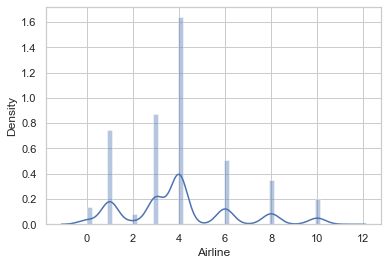

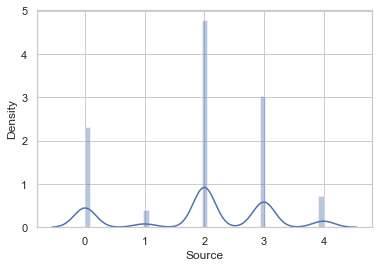

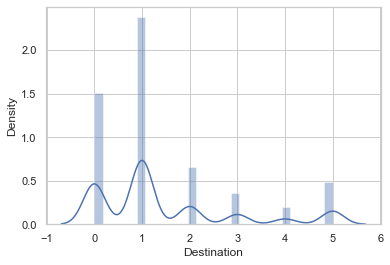

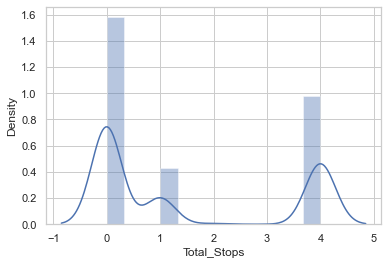

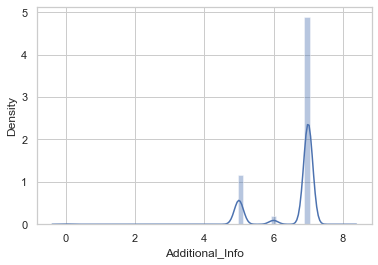

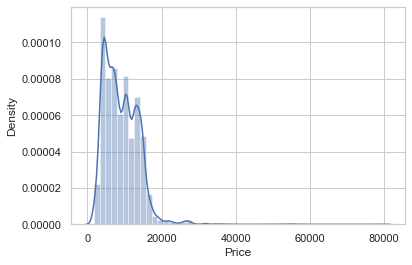

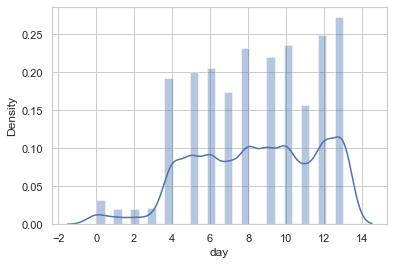

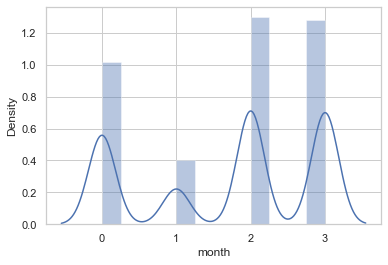

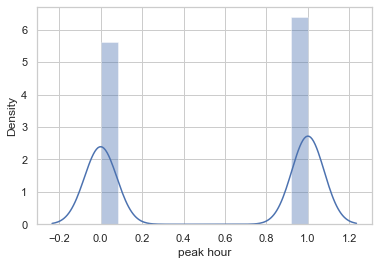

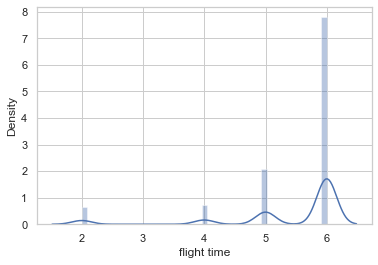

In [74]:
for j in flight_train:
    sns.distplot(flight_train[j])
    plt.show()

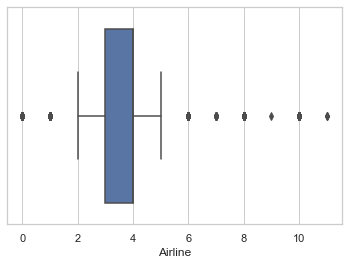

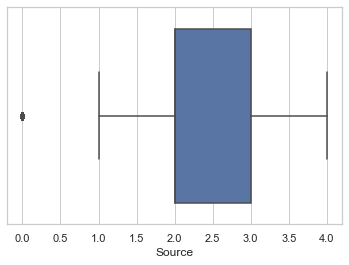

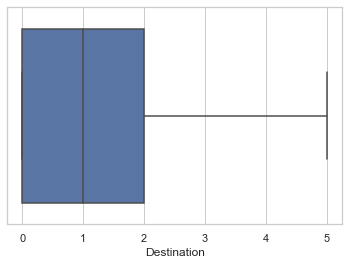

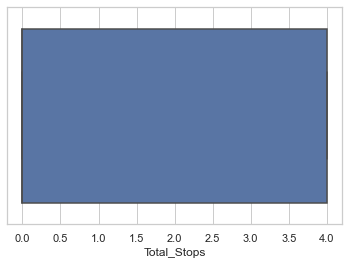

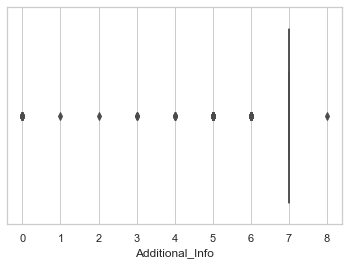

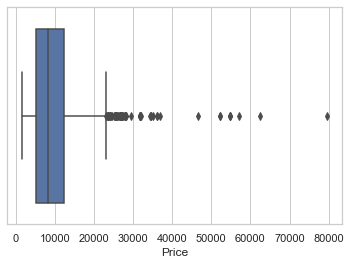

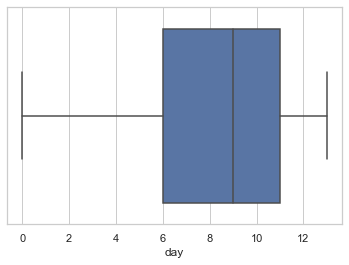

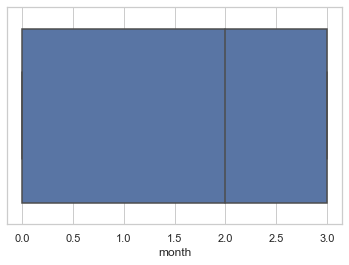

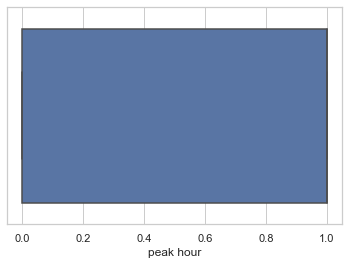

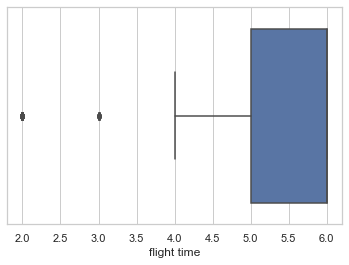

In [75]:
for k in flight_train:
    sns.boxplot(flight_train[k])
    plt.show()

Only price column has outliers in the dataset

In [76]:
#arresting the outliers using IQR method
def out(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    whisker_width = 1.5
    news_outliers = df[(df[col] < Q1 - whisker_width*IQR) | (df[col] > Q3 + whisker_width*IQR)]
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    df[col]=np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

In [77]:
out(flight_train,'Price')

<AxesSubplot:xlabel='Price'>

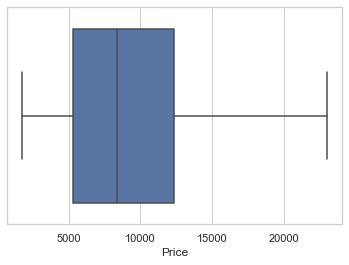

In [78]:
sns.boxplot(flight_train['Price'])

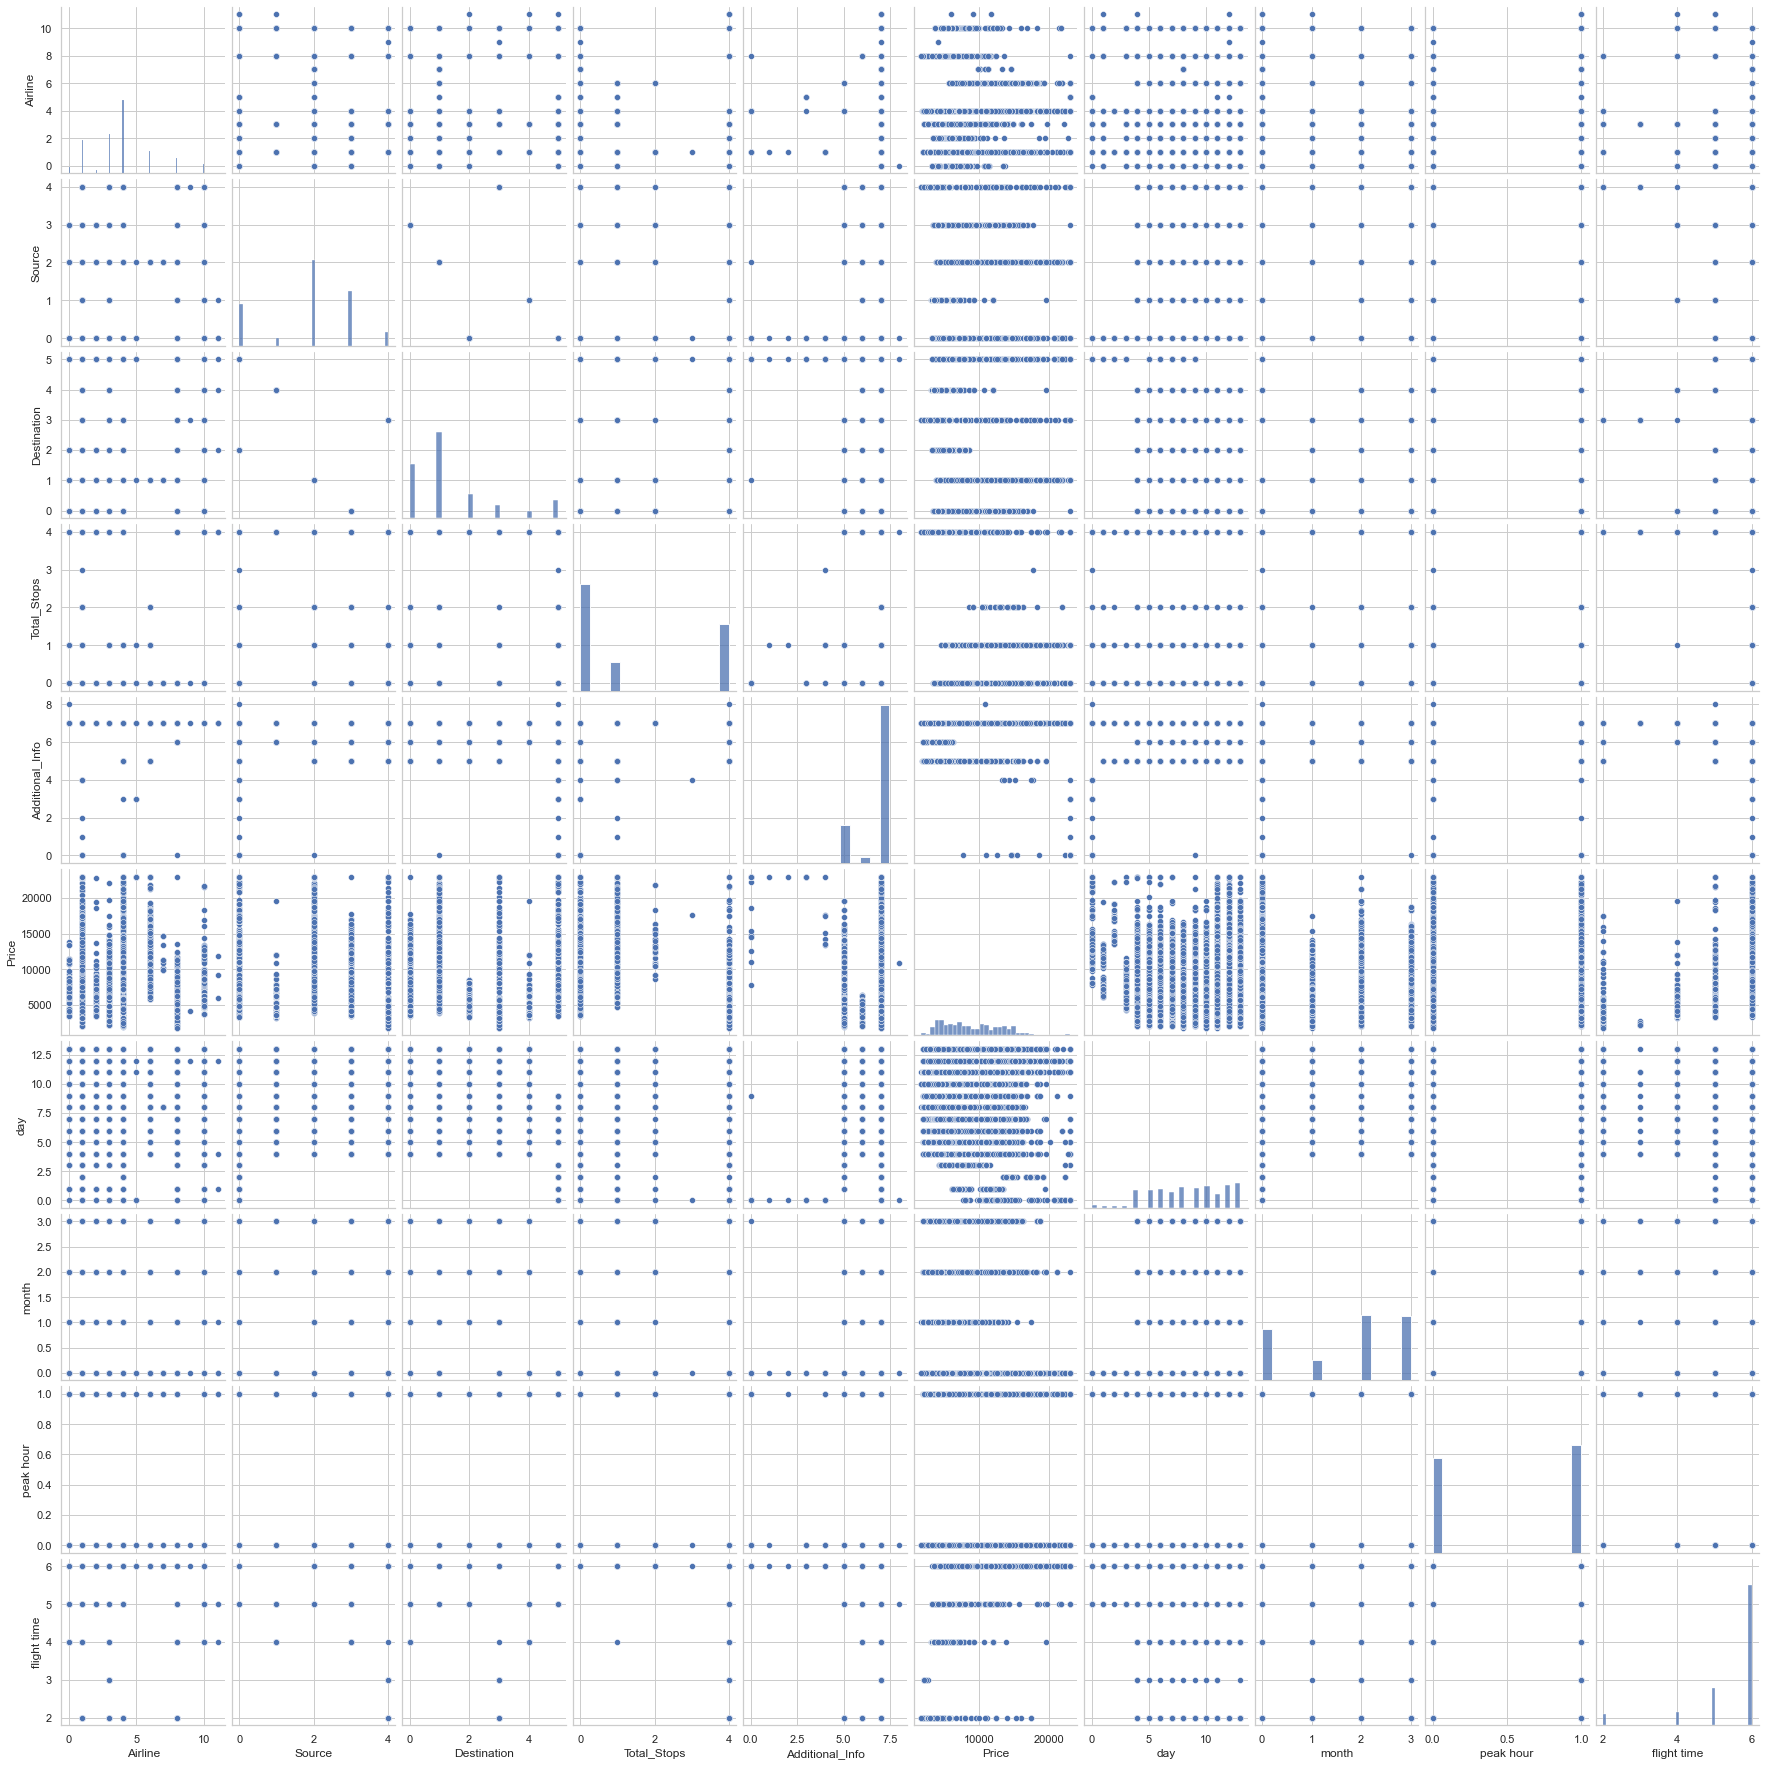

In [79]:
sns.pairplot(flight_train)

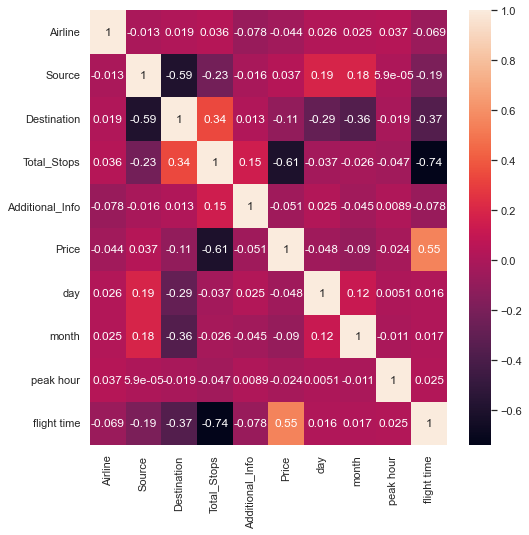

In [80]:
plt.figure(figsize=(8,8))
sns.heatmap(flight_train.corr(), annot=True)
plt.show()

Dropping Source, Destination and total Stop to remove multi-colinearity 

In [81]:
flight_train.drop(columns=['Source','Destination','Total_Stops'],inplace=True)
flight_test.drop(columns=['Source','Destination','Total_Stops'],inplace=True)

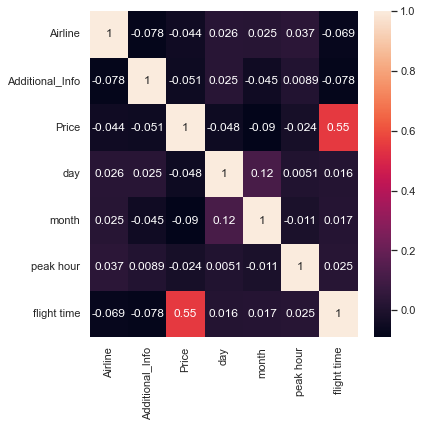

In [82]:
plt.figure(figsize=(6,6))
sns.heatmap(flight_train.corr(), annot=True)
plt.show()

In [83]:
flight_train.skew()

Airline            0.731020
Additional_Info   -2.114244
Price              0.592640
day               -0.307170
month             -0.387625
peak hour         -0.128171
flight time       -2.237800
dtype: float64

In [84]:
X=flight_train.drop(columns=['Price'])
Y=flight_train['Price']

In [85]:
X.head()

,Airline,Additional_Info,day,month,peak hour,flight time
0,3,7,9,0,0,5
1,1,7,4,2,0,6
2,4,7,13,3,0,6
3,3,7,5,2,0,6
4,3,7,0,0,1,6


In [86]:
flight_test.head()

,Airline,Additional_Info,day,month,peak hour,flight time
0,4,5,12,3,1,6
1,3,5,5,2,1,6
2,4,3,8,2,1,6
3,6,5,8,2,1,6
4,0,5,9,3,0,5


Normalizing the data

In [87]:
scalar= StandardScaler()
X_scaled= scalar.fit_transform(X)

In [88]:
#checking VIF value
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
  
vif_data

,feature,VIF
0,Airline,1.014688
1,Additional_Info,1.016312
2,day,1.015475
3,month,1.016508
4,peak hour,1.002469
5,flight time,1.013248


In [89]:
scalar= StandardScaler()
test_set= scalar.fit_transform(flight_test)

In [ ]:
EDA Summary:
1. Nullifed the null values
2. Analyised the data via Univariate and Bi-variate
3. reduced complexity of the dataset
4. removed outliers
5. Normalized the data

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y, test_size= 0.2, random_state=15)

In [92]:
xgb=XGBRegressor()
param_grid = {
    'n_estimators': [200,250,300,350],
    'max_depth': [3, 4, 5, 6, 8, 15],
    'learning_rate':[0.1,0.15,0.2,0.3],
    'gamma':[0.0,0.1,0.2,0.3],
    'n_jobs':[100,200,300]
}
CV_xgb = gs(xgb,param_grid=param_grid,scoring ='r2',cv=10,verbose=5)
CV_xgb.fit(X_train,Y_train)

Fitting 10 folds for each of 1152 candidates, totalling 11520 fits
[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.800 total time=   0.1s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.836 total time=   0.1s
[CV 3/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.760 total time=   0.1s
[CV 4/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.813 total time=   0.1s
[CV 5/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.762 total time=   0.1s
[CV 6/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.774 total time=   0.1s
[CV 7/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.790 total time=   0.1s
[CV 8/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.811 

[CV 10/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=100;, score=0.807 total time=   0.3s
[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=200;, score=0.801 total time=   0.5s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=200;, score=0.839 total time=   0.4s
[CV 3/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=200;, score=0.765 total time=   0.4s
[CV 4/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=200;, score=0.815 total time=   0.4s
[CV 5/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=200;, score=0.766 total time=   0.4s
[CV 6/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=200;, score=0.778 total time=   0.4s
[CV 7/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=200;, score=0.793 total time=   0.4s
[CV 8/10] END gamma=0.0, learning_rate=0.1, max

[CV 9/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=200;, score=0.832 total time=   0.3s
[CV 10/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=200;, score=0.806 total time=   0.3s
[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300;, score=0.806 total time=   0.5s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300;, score=0.839 total time=   0.4s
[CV 3/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300;, score=0.774 total time=   0.4s
[CV 4/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300;, score=0.816 total time=   0.4s
[CV 5/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300;, score=0.773 total time=   0.5s
[CV 6/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300;, score=0.782 total time=   0.4s
[CV 7/10] END gamma=0.0, learning_rate=0.1, max

[CV 8/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.829 total time=   0.8s
[CV 9/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.834 total time=   0.8s
[CV 10/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.805 total time=   0.8s
[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=100;, score=0.807 total time=   0.4s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=100;, score=0.838 total time=   0.4s
[CV 3/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=100;, score=0.777 total time=   0.4s
[CV 4/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=100;, score=0.817 total time=   0.4s
[CV 5/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=100;, score=0.775 total time=   0.4s
[CV 6/10] END gamma=0.0, learning_rate=0.1, max

[CV 7/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.804 total time=   0.4s
[CV 8/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.835 total time=   0.4s
[CV 9/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.837 total time=   0.4s
[CV 10/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.809 total time=   0.4s
[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=200;, score=0.804 total time=   0.7s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=200;, score=0.840 total time=   0.6s
[CV 3/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=200;, score=0.776 total time=   0.6s
[CV 4/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=200;, score=0.813 total time=   0.6s
[CV 5/10] END gamma=0.0, learning_rate=0.1, max

[CV 6/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.790 total time=   0.9s
[CV 7/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.805 total time=   0.9s
[CV 8/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.834 total time=   0.9s
[CV 9/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.837 total time=   0.9s
[CV 10/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.807 total time=   0.9s
[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=300;, score=0.805 total time=   1.3s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=300;, score=0.839 total time=   1.2s
[CV 3/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=300;, score=0.775 total time=   1.3s
[CV 4/10] END gamma=0.0, learning_rate=0.1, max

[CV 5/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.777 total time=   1.1s
[CV 6/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.795 total time=   1.1s
[CV 7/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.808 total time=   1.2s
[CV 8/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.834 total time=   1.1s
[CV 9/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.838 total time=   1.1s
[CV 10/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.811 total time=   1.1s
[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=300, n_jobs=100;, score=0.800 total time=   0.7s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=300, n_jobs=100;, score=0.834 total time=   0.7s
[CV 3/10] END gamma=0.0, learning_rate=0.1, max

[CV 4/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.802 total time=   0.7s
[CV 5/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.768 total time=   0.7s
[CV 6/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.787 total time=   0.7s
[CV 7/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.796 total time=   0.7s
[CV 8/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.826 total time=   0.8s
[CV 9/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.838 total time=   0.7s
[CV 10/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.804 total time=   0.7s
[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=200;, score=0.790 total time=   1.1s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max

[CV 3/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.755 total time=   1.9s
[CV 4/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.799 total time=   1.9s
[CV 5/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.766 total time=   1.9s
[CV 6/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.784 total time=   1.9s
[CV 7/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.795 total time=   1.9s
[CV 8/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.824 total time=   1.8s
[CV 9/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.835 total time=   1.7s
[CV 10/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.802 total time=   2.0s
[CV 1/10] END gamma=0.0, learning_rate=0.1, max

[CV 2/10] END gamma=0.0, learning_rate=0.1, max_depth=15, n_estimators=200, n_jobs=300;, score=0.821 total time=  12.7s
[CV 3/10] END gamma=0.0, learning_rate=0.1, max_depth=15, n_estimators=200, n_jobs=300;, score=0.745 total time=  12.1s
[CV 4/10] END gamma=0.0, learning_rate=0.1, max_depth=15, n_estimators=200, n_jobs=300;, score=0.799 total time=  11.9s
[CV 5/10] END gamma=0.0, learning_rate=0.1, max_depth=15, n_estimators=200, n_jobs=300;, score=0.755 total time=  12.9s
[CV 6/10] END gamma=0.0, learning_rate=0.1, max_depth=15, n_estimators=200, n_jobs=300;, score=0.781 total time=  12.7s
[CV 7/10] END gamma=0.0, learning_rate=0.1, max_depth=15, n_estimators=200, n_jobs=300;, score=0.792 total time=  11.4s
[CV 8/10] END gamma=0.0, learning_rate=0.1, max_depth=15, n_estimators=200, n_jobs=300;, score=0.821 total time=  12.2s
[CV 9/10] END gamma=0.0, learning_rate=0.1, max_depth=15, n_estimators=200, n_jobs=300;, score=0.834 total time=  12.1s
[CV 10/10] END gamma=0.0, learning_rate=

[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=15, n_estimators=350, n_jobs=100;, score=0.780 total time=   8.7s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max_depth=15, n_estimators=350, n_jobs=100;, score=0.821 total time=   9.0s
[CV 3/10] END gamma=0.0, learning_rate=0.1, max_depth=15, n_estimators=350, n_jobs=100;, score=0.745 total time=   8.8s
[CV 4/10] END gamma=0.0, learning_rate=0.1, max_depth=15, n_estimators=350, n_jobs=100;, score=0.799 total time=   8.8s
[CV 5/10] END gamma=0.0, learning_rate=0.1, max_depth=15, n_estimators=350, n_jobs=100;, score=0.755 total time=   8.8s
[CV 6/10] END gamma=0.0, learning_rate=0.1, max_depth=15, n_estimators=350, n_jobs=100;, score=0.781 total time=   9.3s
[CV 7/10] END gamma=0.0, learning_rate=0.1, max_depth=15, n_estimators=350, n_jobs=100;, score=0.792 total time=   8.1s
[CV 8/10] END gamma=0.0, learning_rate=0.1, max_depth=15, n_estimators=350, n_jobs=100;, score=0.821 total time=   8.3s
[CV 9/10] END gamma=0.0, learning_rate=0

[CV 10/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=100;, score=0.807 total time=   0.2s
[CV 1/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=200;, score=0.804 total time=   0.4s
[CV 2/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=200;, score=0.838 total time=   0.4s
[CV 3/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=200;, score=0.769 total time=   0.4s
[CV 4/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=200;, score=0.816 total time=   0.4s
[CV 5/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=200;, score=0.767 total time=   0.4s
[CV 6/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=200;, score=0.781 total time=   0.4s
[CV 7/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=200;, score=0.794 total time=   0.4s
[CV 8/10] END gamma=0.0, learning_rate=

[CV 9/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=200;, score=0.832 total time=   0.6s
[CV 10/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=200;, score=0.809 total time=   0.6s
[CV 1/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=300;, score=0.805 total time=   0.8s
[CV 2/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=300;, score=0.839 total time=   0.7s
[CV 3/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=300;, score=0.769 total time=   0.7s
[CV 4/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=300;, score=0.816 total time=   0.7s
[CV 5/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=300;, score=0.771 total time=   0.7s
[CV 6/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=300;, score=0.785 total time=   0.7s
[CV 7/10] END gamma=0.0, learning_rate=

[CV 8/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=300;, score=0.831 total time=   0.7s
[CV 9/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=300;, score=0.836 total time=   0.7s
[CV 10/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=300;, score=0.806 total time=   0.7s
[CV 1/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=100;, score=0.803 total time=   0.4s
[CV 2/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=100;, score=0.838 total time=   0.4s
[CV 3/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=100;, score=0.780 total time=   0.4s
[CV 4/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=100;, score=0.817 total time=   0.4s
[CV 5/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=100;, score=0.780 total time=   0.4s
[CV 6/10] END gamma=0.0, learning_rate=

[CV 7/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=100;, score=0.806 total time=   0.3s
[CV 8/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=100;, score=0.835 total time=   0.3s
[CV 9/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=100;, score=0.837 total time=   0.3s
[CV 10/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=100;, score=0.810 total time=   0.3s
[CV 1/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=200;, score=0.805 total time=   0.5s
[CV 2/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=200;, score=0.840 total time=   0.5s
[CV 3/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=200;, score=0.776 total time=   0.5s
[CV 4/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=200;, score=0.810 total time=   0.5s
[CV 5/10] END gamma=0.0, learning_rate=

[CV 6/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=200;, score=0.790 total time=   0.8s
[CV 7/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=200;, score=0.806 total time=   0.8s
[CV 8/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=200;, score=0.835 total time=   0.8s
[CV 9/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=200;, score=0.837 total time=   0.8s
[CV 10/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=200;, score=0.808 total time=   0.8s
[CV 1/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=300;, score=0.802 total time=   1.2s
[CV 2/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=300;, score=0.838 total time=   1.2s
[CV 3/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=300;, score=0.775 total time=   1.1s
[CV 4/10] END gamma=0.0, learning_rate=

[CV 5/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=300;, score=0.774 total time=   0.9s
[CV 6/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=300;, score=0.792 total time=   0.9s
[CV 7/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=300;, score=0.806 total time=   0.9s
[CV 8/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=300;, score=0.834 total time=   0.9s
[CV 9/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=300;, score=0.839 total time=   0.9s
[CV 10/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=300;, score=0.809 total time=   0.9s
[CV 1/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=100;, score=0.795 total time=   0.6s
[CV 2/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=100;, score=0.831 total time=   0.6s
[CV 3/10] END gamma=0.0, learning_rate=

[CV 4/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=100;, score=0.806 total time=   0.8s
[CV 5/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=100;, score=0.772 total time=   0.8s
[CV 6/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=100;, score=0.789 total time=   0.8s
[CV 7/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=100;, score=0.805 total time=   0.8s
[CV 8/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=100;, score=0.830 total time=   0.8s
[CV 9/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=100;, score=0.838 total time=   0.8s
[CV 10/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=100;, score=0.806 total time=   0.8s
[CV 1/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=200;, score=0.792 total time=   1.3s
[CV 2/10] END gamma=0.0, learning_rate=

[CV 3/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=200;, score=0.754 total time=   1.6s
[CV 4/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=200;, score=0.796 total time=   1.6s
[CV 5/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=200;, score=0.762 total time=   1.6s
[CV 6/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=200;, score=0.783 total time=   1.5s
[CV 7/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=200;, score=0.795 total time=   1.6s
[CV 8/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=200;, score=0.822 total time=   1.5s
[CV 9/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=200;, score=0.834 total time=   1.6s
[CV 10/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=200;, score=0.801 total time=   1.6s
[CV 1/10] END gamma=0.0, learning_rate=

[CV 2/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=300;, score=0.821 total time=   3.4s
[CV 3/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=300;, score=0.753 total time=   3.4s
[CV 4/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=300;, score=0.795 total time=   3.3s
[CV 5/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=300;, score=0.761 total time=   3.2s
[CV 6/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=300;, score=0.781 total time=   3.3s
[CV 7/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=300;, score=0.794 total time=   3.2s
[CV 8/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=300;, score=0.821 total time=   3.4s
[CV 9/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=300;, score=0.833 total time=   3.0s
[CV 10/10] END gamma=0.0, learning_rate=

[CV 10/10] END gamma=0.0, learning_rate=0.15, max_depth=15, n_estimators=250, n_jobs=300;, score=0.798 total time=  15.8s
[CV 1/10] END gamma=0.0, learning_rate=0.15, max_depth=15, n_estimators=300, n_jobs=100;, score=0.780 total time=   6.8s
[CV 2/10] END gamma=0.0, learning_rate=0.15, max_depth=15, n_estimators=300, n_jobs=100;, score=0.822 total time=   6.9s
[CV 3/10] END gamma=0.0, learning_rate=0.15, max_depth=15, n_estimators=300, n_jobs=100;, score=0.745 total time=   7.0s
[CV 4/10] END gamma=0.0, learning_rate=0.15, max_depth=15, n_estimators=300, n_jobs=100;, score=0.804 total time=   6.9s
[CV 5/10] END gamma=0.0, learning_rate=0.15, max_depth=15, n_estimators=300, n_jobs=100;, score=0.759 total time=   7.0s
[CV 6/10] END gamma=0.0, learning_rate=0.15, max_depth=15, n_estimators=300, n_jobs=100;, score=0.780 total time=   7.2s
[CV 7/10] END gamma=0.0, learning_rate=0.15, max_depth=15, n_estimators=300, n_jobs=100;, score=0.792 total time=   6.9s
[CV 8/10] END gamma=0.0, learni

[CV 8/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=100;, score=0.821 total time=   0.1s
[CV 9/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=100;, score=0.826 total time=   0.1s
[CV 10/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=100;, score=0.808 total time=   0.1s
[CV 1/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.803 total time=   0.3s
[CV 2/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.839 total time=   0.3s
[CV 3/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.769 total time=   0.3s
[CV 4/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.816 total time=   0.3s
[CV 5/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.770 total time=   0.3s
[CV 6/10] END gamma=0.0, learning_rate=0.2, max

[CV 7/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=200;, score=0.796 total time=   0.5s
[CV 8/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=200;, score=0.825 total time=   0.4s
[CV 9/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=200;, score=0.830 total time=   0.4s
[CV 10/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=200;, score=0.807 total time=   0.5s
[CV 1/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.805 total time=   0.6s
[CV 2/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.838 total time=   0.6s
[CV 3/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.771 total time=   0.6s
[CV 4/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.816 total time=   0.6s
[CV 5/10] END gamma=0.0, learning_rate=0.2, max

[CV 6/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=300;, score=0.790 total time=   0.5s
[CV 7/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=300;, score=0.803 total time=   0.5s
[CV 8/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=300;, score=0.832 total time=   0.5s
[CV 9/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=300;, score=0.836 total time=   0.5s
[CV 10/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=300;, score=0.806 total time=   0.5s
[CV 1/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.804 total time=   0.3s
[CV 2/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.837 total time=   0.3s
[CV 3/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.777 total time=   0.3s
[CV 4/10] END gamma=0.0, learning_rate=0.2, max

[CV 5/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=100;, score=0.779 total time=   0.4s
[CV 6/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=100;, score=0.791 total time=   0.4s
[CV 7/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=100;, score=0.804 total time=   0.4s
[CV 8/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=100;, score=0.835 total time=   0.4s
[CV 9/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=100;, score=0.836 total time=   0.4s
[CV 10/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=100;, score=0.805 total time=   0.4s
[CV 1/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.804 total time=   0.8s
[CV 2/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.836 total time=   0.8s
[CV 3/10] END gamma=0.0, learning_rate=0.2, max

[CV 4/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=200;, score=0.809 total time=   0.6s
[CV 5/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=200;, score=0.778 total time=   0.6s
[CV 6/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=200;, score=0.796 total time=   0.6s
[CV 7/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=200;, score=0.806 total time=   0.6s
[CV 8/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=200;, score=0.834 total time=   0.6s
[CV 9/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=200;, score=0.838 total time=   0.6s
[CV 10/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=200;, score=0.807 total time=   0.6s
[CV 1/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.801 total time=   0.9s
[CV 2/10] END gamma=0.0, learning_rate=0.2, max

[CV 3/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=300;, score=0.771 total time=   1.4s
[CV 4/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=300;, score=0.808 total time=   1.4s
[CV 5/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=300;, score=0.777 total time=   1.4s
[CV 6/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=300;, score=0.796 total time=   1.4s
[CV 7/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=300;, score=0.806 total time=   1.4s
[CV 8/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=300;, score=0.833 total time=   1.4s
[CV 9/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=300;, score=0.838 total time=   1.4s
[CV 10/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=300;, score=0.805 total time=   1.4s
[CV 1/10] END gamma=0.0, learning_rate=0.2, max

[CV 2/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=100;, score=0.825 total time=   0.7s
[CV 3/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=100;, score=0.763 total time=   0.7s
[CV 4/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=100;, score=0.802 total time=   0.7s
[CV 5/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=100;, score=0.775 total time=   0.7s
[CV 6/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=100;, score=0.792 total time=   0.7s
[CV 7/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=100;, score=0.803 total time=   0.7s
[CV 8/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=100;, score=0.830 total time=   0.7s
[CV 9/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=100;, score=0.838 total time=   0.7s
[CV 10/10] END gamma=0.0, learning_rate=0.2, max

[CV 1/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.785 total time=   1.3s
[CV 2/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.822 total time=   1.3s
[CV 3/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.755 total time=   1.3s
[CV 4/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.802 total time=   1.3s
[CV 5/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.764 total time=   1.3s
[CV 6/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.784 total time=   1.3s
[CV 7/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.794 total time=   1.3s
[CV 8/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.821 total time=   1.2s
[CV 9/10] END gamma=0.0, learning_rate=0.2, max_

[CV 10/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=200;, score=0.798 total time=   2.1s
[CV 1/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.783 total time=   2.7s
[CV 2/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.820 total time=   2.8s
[CV 3/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.754 total time=   2.8s
[CV 4/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.800 total time=   2.6s
[CV 5/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.762 total time=   2.8s
[CV 6/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.782 total time=   2.9s
[CV 7/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.793 total time=   2.9s
[CV 8/10] END gamma=0.0, learning_rate=0.2, max

[CV 9/10] END gamma=0.0, learning_rate=0.2, max_depth=15, n_estimators=200, n_jobs=300;, score=0.834 total time=  11.9s
[CV 10/10] END gamma=0.0, learning_rate=0.2, max_depth=15, n_estimators=200, n_jobs=300;, score=0.796 total time=  12.3s
[CV 1/10] END gamma=0.0, learning_rate=0.2, max_depth=15, n_estimators=250, n_jobs=100;, score=0.781 total time=   5.5s
[CV 2/10] END gamma=0.0, learning_rate=0.2, max_depth=15, n_estimators=250, n_jobs=100;, score=0.821 total time=   5.2s
[CV 3/10] END gamma=0.0, learning_rate=0.2, max_depth=15, n_estimators=250, n_jobs=100;, score=0.746 total time=   5.2s
[CV 4/10] END gamma=0.0, learning_rate=0.2, max_depth=15, n_estimators=250, n_jobs=100;, score=0.801 total time=   5.5s
[CV 5/10] END gamma=0.0, learning_rate=0.2, max_depth=15, n_estimators=250, n_jobs=100;, score=0.756 total time=   5.0s
[CV 6/10] END gamma=0.0, learning_rate=0.2, max_depth=15, n_estimators=250, n_jobs=100;, score=0.781 total time=   5.2s
[CV 7/10] END gamma=0.0, learning_rate=

[CV 8/10] END gamma=0.0, learning_rate=0.2, max_depth=15, n_estimators=350, n_jobs=100;, score=0.821 total time=   6.1s
[CV 9/10] END gamma=0.0, learning_rate=0.2, max_depth=15, n_estimators=350, n_jobs=100;, score=0.834 total time=   6.6s
[CV 10/10] END gamma=0.0, learning_rate=0.2, max_depth=15, n_estimators=350, n_jobs=100;, score=0.796 total time=   6.6s
[CV 1/10] END gamma=0.0, learning_rate=0.2, max_depth=15, n_estimators=350, n_jobs=200;, score=0.781 total time=  12.5s
[CV 2/10] END gamma=0.0, learning_rate=0.2, max_depth=15, n_estimators=350, n_jobs=200;, score=0.821 total time=  11.2s
[CV 3/10] END gamma=0.0, learning_rate=0.2, max_depth=15, n_estimators=350, n_jobs=200;, score=0.746 total time=  11.6s
[CV 4/10] END gamma=0.0, learning_rate=0.2, max_depth=15, n_estimators=350, n_jobs=200;, score=0.801 total time=  12.9s
[CV 5/10] END gamma=0.0, learning_rate=0.2, max_depth=15, n_estimators=350, n_jobs=200;, score=0.756 total time=  10.6s
[CV 6/10] END gamma=0.0, learning_rate=

[CV 7/10] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=250, n_jobs=200;, score=0.797 total time=   0.4s
[CV 8/10] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=250, n_jobs=200;, score=0.827 total time=   0.4s
[CV 9/10] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=250, n_jobs=200;, score=0.831 total time=   0.4s
[CV 10/10] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=250, n_jobs=200;, score=0.808 total time=   0.4s
[CV 1/10] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=250, n_jobs=300;, score=0.806 total time=   0.5s
[CV 2/10] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=250, n_jobs=300;, score=0.840 total time=   0.5s
[CV 3/10] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=250, n_jobs=300;, score=0.770 total time=   0.5s
[CV 4/10] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=250, n_jobs=300;, score=0.816 total time=   0.5s
[CV 5/10] END gamma=0.0, learning_rate=0.3, max

[CV 6/10] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=350, n_jobs=300;, score=0.790 total time=   0.7s
[CV 7/10] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=350, n_jobs=300;, score=0.799 total time=   0.7s
[CV 8/10] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=350, n_jobs=300;, score=0.829 total time=   0.7s
[CV 9/10] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=350, n_jobs=300;, score=0.833 total time=   0.7s
[CV 10/10] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=350, n_jobs=300;, score=0.807 total time=   0.7s
[CV 1/10] END gamma=0.0, learning_rate=0.3, max_depth=4, n_estimators=200, n_jobs=100;, score=0.804 total time=   0.2s
[CV 2/10] END gamma=0.0, learning_rate=0.3, max_depth=4, n_estimators=200, n_jobs=100;, score=0.836 total time=   0.2s
[CV 3/10] END gamma=0.0, learning_rate=0.3, max_depth=4, n_estimators=200, n_jobs=100;, score=0.779 total time=   0.2s
[CV 4/10] END gamma=0.0, learning_rate=0.3, max

[CV 5/10] END gamma=0.0, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=100;, score=0.780 total time=   0.4s
[CV 6/10] END gamma=0.0, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=100;, score=0.794 total time=   0.4s
[CV 7/10] END gamma=0.0, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=100;, score=0.805 total time=   0.4s
[CV 8/10] END gamma=0.0, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=100;, score=0.836 total time=   0.4s
[CV 9/10] END gamma=0.0, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=100;, score=0.836 total time=   0.4s
[CV 10/10] END gamma=0.0, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=100;, score=0.807 total time=   0.4s
[CV 1/10] END gamma=0.0, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=200;, score=0.801 total time=   0.7s
[CV 2/10] END gamma=0.0, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=200;, score=0.836 total time=   0.6s
[CV 3/10] END gamma=0.0, learning_rate=0.3, max

[CV 4/10] END gamma=0.0, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200;, score=0.806 total time=   0.5s
[CV 5/10] END gamma=0.0, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200;, score=0.778 total time=   0.5s
[CV 6/10] END gamma=0.0, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200;, score=0.791 total time=   0.5s
[CV 7/10] END gamma=0.0, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200;, score=0.805 total time=   0.5s
[CV 8/10] END gamma=0.0, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200;, score=0.832 total time=   0.5s
[CV 9/10] END gamma=0.0, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200;, score=0.837 total time=   0.5s
[CV 10/10] END gamma=0.0, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200;, score=0.810 total time=   0.5s
[CV 1/10] END gamma=0.0, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=300;, score=0.799 total time=   0.7s
[CV 2/10] END gamma=0.0, learning_rate=0.3, max

[CV 3/10] END gamma=0.0, learning_rate=0.3, max_depth=5, n_estimators=300, n_jobs=300;, score=0.773 total time=   1.1s
[CV 4/10] END gamma=0.0, learning_rate=0.3, max_depth=5, n_estimators=300, n_jobs=300;, score=0.804 total time=   1.1s
[CV 5/10] END gamma=0.0, learning_rate=0.3, max_depth=5, n_estimators=300, n_jobs=300;, score=0.778 total time=   1.1s
[CV 6/10] END gamma=0.0, learning_rate=0.3, max_depth=5, n_estimators=300, n_jobs=300;, score=0.790 total time=   1.1s
[CV 7/10] END gamma=0.0, learning_rate=0.3, max_depth=5, n_estimators=300, n_jobs=300;, score=0.804 total time=   1.1s
[CV 8/10] END gamma=0.0, learning_rate=0.3, max_depth=5, n_estimators=300, n_jobs=300;, score=0.832 total time=   1.1s
[CV 9/10] END gamma=0.0, learning_rate=0.3, max_depth=5, n_estimators=300, n_jobs=300;, score=0.837 total time=   1.1s
[CV 10/10] END gamma=0.0, learning_rate=0.3, max_depth=5, n_estimators=300, n_jobs=300;, score=0.806 total time=   1.1s
[CV 1/10] END gamma=0.0, learning_rate=0.3, max

[CV 2/10] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=250, n_jobs=100;, score=0.826 total time=   0.6s
[CV 3/10] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=250, n_jobs=100;, score=0.760 total time=   0.6s
[CV 4/10] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=250, n_jobs=100;, score=0.799 total time=   0.6s
[CV 5/10] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=250, n_jobs=100;, score=0.774 total time=   0.6s
[CV 6/10] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=250, n_jobs=100;, score=0.792 total time=   0.6s
[CV 7/10] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=250, n_jobs=100;, score=0.801 total time=   0.6s
[CV 8/10] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=250, n_jobs=100;, score=0.827 total time=   0.6s
[CV 9/10] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=250, n_jobs=100;, score=0.837 total time=   0.6s
[CV 10/10] END gamma=0.0, learning_rate=0.3, max

[CV 1/10] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=350, n_jobs=200;, score=0.788 total time=   1.3s
[CV 2/10] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=350, n_jobs=200;, score=0.823 total time=   1.3s
[CV 3/10] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=350, n_jobs=200;, score=0.759 total time=   1.3s
[CV 4/10] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=350, n_jobs=200;, score=0.797 total time=   1.3s
[CV 5/10] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=350, n_jobs=200;, score=0.772 total time=   1.4s
[CV 6/10] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=350, n_jobs=200;, score=0.790 total time=   1.3s
[CV 7/10] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=350, n_jobs=200;, score=0.799 total time=   1.4s
[CV 8/10] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=350, n_jobs=200;, score=0.826 total time=   1.4s
[CV 9/10] END gamma=0.0, learning_rate=0.3, max_

[CV 10/10] END gamma=0.0, learning_rate=0.3, max_depth=8, n_estimators=250, n_jobs=200;, score=0.797 total time=   1.7s
[CV 1/10] END gamma=0.0, learning_rate=0.3, max_depth=8, n_estimators=250, n_jobs=300;, score=0.779 total time=   2.3s
[CV 2/10] END gamma=0.0, learning_rate=0.3, max_depth=8, n_estimators=250, n_jobs=300;, score=0.816 total time=   2.4s
[CV 3/10] END gamma=0.0, learning_rate=0.3, max_depth=8, n_estimators=250, n_jobs=300;, score=0.750 total time=   2.4s
[CV 4/10] END gamma=0.0, learning_rate=0.3, max_depth=8, n_estimators=250, n_jobs=300;, score=0.794 total time=   2.4s
[CV 5/10] END gamma=0.0, learning_rate=0.3, max_depth=8, n_estimators=250, n_jobs=300;, score=0.765 total time=   2.5s
[CV 6/10] END gamma=0.0, learning_rate=0.3, max_depth=8, n_estimators=250, n_jobs=300;, score=0.778 total time=   2.5s
[CV 7/10] END gamma=0.0, learning_rate=0.3, max_depth=8, n_estimators=250, n_jobs=300;, score=0.791 total time=   2.5s
[CV 8/10] END gamma=0.0, learning_rate=0.3, max

[CV 9/10] END gamma=0.0, learning_rate=0.3, max_depth=8, n_estimators=350, n_jobs=300;, score=0.831 total time=   3.6s
[CV 10/10] END gamma=0.0, learning_rate=0.3, max_depth=8, n_estimators=350, n_jobs=300;, score=0.797 total time=   3.5s
[CV 1/10] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=100;, score=0.781 total time=   3.6s
[CV 2/10] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=100;, score=0.820 total time=   3.7s
[CV 3/10] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=100;, score=0.750 total time=   3.5s
[CV 4/10] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=100;, score=0.799 total time=   3.6s
[CV 5/10] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=100;, score=0.755 total time=   3.4s
[CV 6/10] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=100;, score=0.780 total time=   3.6s
[CV 7/10] END gamma=0.0, learning_rate=0.

[CV 8/10] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=300, n_jobs=100;, score=0.820 total time=   4.4s
[CV 9/10] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=300, n_jobs=100;, score=0.832 total time=   4.7s
[CV 10/10] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=300, n_jobs=100;, score=0.796 total time=   4.7s
[CV 1/10] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=300, n_jobs=200;, score=0.781 total time=   8.3s
[CV 2/10] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=300, n_jobs=200;, score=0.820 total time=   8.4s
[CV 3/10] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=300, n_jobs=200;, score=0.750 total time=   7.8s
[CV 4/10] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=300, n_jobs=200;, score=0.799 total time=   7.9s
[CV 5/10] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=300, n_jobs=200;, score=0.755 total time=   7.3s
[CV 6/10] END gamma=0.0, learning_rate=

[CV 7/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=200;, score=0.790 total time=   0.3s
[CV 8/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=200;, score=0.811 total time=   0.3s
[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=200;, score=0.825 total time=   0.3s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=200;, score=0.803 total time=   0.3s
[CV 1/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=300;, score=0.800 total time=   0.4s
[CV 2/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=300;, score=0.836 total time=   0.4s
[CV 3/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=300;, score=0.760 total time=   0.4s
[CV 4/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=300;, score=0.813 total time=   0.4s
[CV 5/10] END gamma=0.1, learning_rate=0.1, max

[CV 6/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=300;, score=0.778 total time=   0.6s
[CV 7/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=300;, score=0.793 total time=   0.6s
[CV 8/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=300;, score=0.816 total time=   0.6s
[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=300;, score=0.827 total time=   0.6s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=300;, score=0.807 total time=   0.6s
[CV 1/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=100;, score=0.803 total time=   0.3s
[CV 2/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=100;, score=0.840 total time=   0.3s
[CV 3/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=100;, score=0.765 total time=   0.3s
[CV 4/10] END gamma=0.1, learning_rate=0.1, max

[CV 5/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=100;, score=0.774 total time=   0.3s
[CV 6/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=100;, score=0.784 total time=   0.3s
[CV 7/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=100;, score=0.799 total time=   0.3s
[CV 8/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=100;, score=0.825 total time=   0.3s
[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=100;, score=0.832 total time=   0.3s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=100;, score=0.805 total time=   0.3s
[CV 1/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=200;, score=0.806 total time=   0.5s
[CV 2/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=200;, score=0.838 total time=   0.5s
[CV 3/10] END gamma=0.1, learning_rate=0.1, max

[CV 4/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=200;, score=0.817 total time=   0.7s
[CV 5/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=200;, score=0.775 total time=   0.7s
[CV 6/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=200;, score=0.787 total time=   0.7s
[CV 7/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=200;, score=0.801 total time=   0.7s
[CV 8/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=200;, score=0.831 total time=   0.7s
[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=200;, score=0.835 total time=   0.7s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=200;, score=0.806 total time=   0.7s
[CV 1/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=300;, score=0.807 total time=   1.0s
[CV 2/10] END gamma=0.1, learning_rate=0.1, max

[CV 3/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=300;, score=0.776 total time=   0.9s
[CV 4/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=300;, score=0.813 total time=   0.9s
[CV 5/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=300;, score=0.774 total time=   0.9s
[CV 6/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=300;, score=0.788 total time=   1.0s
[CV 7/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=300;, score=0.804 total time=   0.9s
[CV 8/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=300;, score=0.835 total time=   0.9s
[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=300;, score=0.837 total time=   0.9s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=300;, score=0.809 total time=   1.0s
[CV 1/10] END gamma=0.1, learning_rate=0.1, max

[CV 2/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=100;, score=0.837 total time=   0.4s
[CV 3/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=100;, score=0.773 total time=   0.4s
[CV 4/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=100;, score=0.813 total time=   0.4s
[CV 5/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=100;, score=0.777 total time=   0.4s
[CV 6/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=100;, score=0.794 total time=   0.4s
[CV 7/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=100;, score=0.808 total time=   0.4s
[CV 8/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=100;, score=0.835 total time=   0.4s
[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=100;, score=0.838 total time=   0.4s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max

[CV 1/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=300, n_jobs=200;, score=0.800 total time=   1.1s
[CV 2/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=300, n_jobs=200;, score=0.834 total time=   1.0s
[CV 3/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=300, n_jobs=200;, score=0.769 total time=   1.1s
[CV 4/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=300, n_jobs=200;, score=0.808 total time=   1.1s
[CV 5/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=300, n_jobs=200;, score=0.776 total time=   1.1s
[CV 6/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=300, n_jobs=200;, score=0.794 total time=   1.1s
[CV 7/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=300, n_jobs=200;, score=0.808 total time=   1.1s
[CV 8/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=300, n_jobs=200;, score=0.834 total time=   1.1s
[CV 9/10] END gamma=0.1, learning_rate=0.1, max_

[CV 10/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=200;, score=0.804 total time=   1.2s
[CV 1/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=300;, score=0.790 total time=   1.6s
[CV 2/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=300;, score=0.829 total time=   1.7s
[CV 3/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=300;, score=0.759 total time=   1.7s
[CV 4/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=300;, score=0.802 total time=   1.7s
[CV 5/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=300;, score=0.768 total time=   1.7s
[CV 6/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=300;, score=0.787 total time=   1.8s
[CV 7/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=300;, score=0.796 total time=   1.7s
[CV 8/10] END gamma=0.1, learning_rate=0.1, max

[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=300;, score=0.835 total time=   2.5s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=300;, score=0.802 total time=   2.7s
[CV 1/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=100;, score=0.785 total time=   1.4s
[CV 2/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=100;, score=0.824 total time=   1.4s
[CV 3/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=100;, score=0.754 total time=   1.4s
[CV 4/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=100;, score=0.798 total time=   1.4s
[CV 5/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=100;, score=0.766 total time=   1.4s
[CV 6/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=100;, score=0.782 total time=   1.5s
[CV 7/10] END gamma=0.1, learning_rate=0.1, max

[CV 8/10] END gamma=0.1, learning_rate=0.1, max_depth=15, n_estimators=250, n_jobs=100;, score=0.821 total time=   5.9s
[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=15, n_estimators=250, n_jobs=100;, score=0.834 total time=   5.8s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max_depth=15, n_estimators=250, n_jobs=100;, score=0.796 total time=   5.9s
[CV 1/10] END gamma=0.1, learning_rate=0.1, max_depth=15, n_estimators=250, n_jobs=200;, score=0.780 total time=  10.6s
[CV 2/10] END gamma=0.1, learning_rate=0.1, max_depth=15, n_estimators=250, n_jobs=200;, score=0.821 total time=  10.9s
[CV 3/10] END gamma=0.1, learning_rate=0.1, max_depth=15, n_estimators=250, n_jobs=200;, score=0.745 total time=  10.6s
[CV 4/10] END gamma=0.1, learning_rate=0.1, max_depth=15, n_estimators=250, n_jobs=200;, score=0.799 total time=  10.2s
[CV 5/10] END gamma=0.1, learning_rate=0.1, max_depth=15, n_estimators=250, n_jobs=200;, score=0.755 total time=  10.8s
[CV 6/10] END gamma=0.1, learning_rate=

[CV 7/10] END gamma=0.1, learning_rate=0.1, max_depth=15, n_estimators=350, n_jobs=200;, score=0.792 total time=  11.4s
[CV 8/10] END gamma=0.1, learning_rate=0.1, max_depth=15, n_estimators=350, n_jobs=200;, score=0.821 total time=  12.3s
[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=15, n_estimators=350, n_jobs=200;, score=0.834 total time=  12.3s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max_depth=15, n_estimators=350, n_jobs=200;, score=0.796 total time=  12.2s
[CV 1/10] END gamma=0.1, learning_rate=0.1, max_depth=15, n_estimators=350, n_jobs=300;, score=0.780 total time=  17.3s
[CV 2/10] END gamma=0.1, learning_rate=0.1, max_depth=15, n_estimators=350, n_jobs=300;, score=0.821 total time=  18.7s
[CV 3/10] END gamma=0.1, learning_rate=0.1, max_depth=15, n_estimators=350, n_jobs=300;, score=0.745 total time=  17.0s
[CV 4/10] END gamma=0.1, learning_rate=0.1, max_depth=15, n_estimators=350, n_jobs=300;, score=0.799 total time=  16.4s
[CV 5/10] END gamma=0.1, learning_rate=

[CV 6/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=300;, score=0.781 total time=   0.5s
[CV 7/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=300;, score=0.794 total time=   0.5s
[CV 8/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=300;, score=0.819 total time=   0.5s
[CV 9/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=300;, score=0.831 total time=   0.5s
[CV 10/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=300;, score=0.807 total time=   0.5s
[CV 1/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.805 total time=   0.3s
[CV 2/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.839 total time=   0.3s
[CV 3/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.769 total time=   0.3s
[CV 4/10] END gamma=0.1, learning_rate=

[CV 5/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=100;, score=0.778 total time=   0.2s
[CV 6/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=100;, score=0.788 total time=   0.2s
[CV 7/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=100;, score=0.800 total time=   0.2s
[CV 8/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=100;, score=0.829 total time=   0.2s
[CV 9/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=100;, score=0.836 total time=   0.2s
[CV 10/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=100;, score=0.806 total time=   0.2s
[CV 1/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.804 total time=   0.4s
[CV 2/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.840 total time=   0.4s
[CV 3/10] END gamma=0.1, learning_rate=

[CV 4/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=200;, score=0.817 total time=   0.6s
[CV 5/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=200;, score=0.780 total time=   0.6s
[CV 6/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=200;, score=0.790 total time=   0.6s
[CV 7/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=200;, score=0.802 total time=   0.6s
[CV 8/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=200;, score=0.833 total time=   0.6s
[CV 9/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=200;, score=0.837 total time=   0.6s
[CV 10/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=200;, score=0.806 total time=   0.6s
[CV 1/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.803 total time=   0.9s
[CV 2/10] END gamma=0.1, learning_rate=

[CV 3/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=300;, score=0.776 total time=   0.7s
[CV 4/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=300;, score=0.810 total time=   0.7s
[CV 5/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=300;, score=0.776 total time=   0.7s
[CV 6/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=300;, score=0.790 total time=   0.7s
[CV 7/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=300;, score=0.806 total time=   0.7s
[CV 8/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=300;, score=0.835 total time=   0.7s
[CV 9/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=300;, score=0.837 total time=   0.7s
[CV 10/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=300;, score=0.810 total time=   0.7s
[CV 1/10] END gamma=0.1, learning_rate=

[CV 2/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=100;, score=0.837 total time=   0.6s
[CV 3/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=100;, score=0.775 total time=   0.6s
[CV 4/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=100;, score=0.809 total time=   0.6s
[CV 5/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=100;, score=0.778 total time=   0.6s
[CV 6/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=100;, score=0.791 total time=   0.6s
[CV 7/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=100;, score=0.806 total time=   0.6s
[CV 8/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=100;, score=0.835 total time=   0.6s
[CV 9/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=100;, score=0.836 total time=   0.6s
[CV 10/10] END gamma=0.1, learning_rate=

[CV 1/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.795 total time=   0.9s
[CV 2/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.831 total time=   0.9s
[CV 3/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.767 total time=   0.9s
[CV 4/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.807 total time=   0.9s
[CV 5/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.773 total time=   0.9s
[CV 6/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.791 total time=   0.9s
[CV 7/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.806 total time=   0.9s
[CV 8/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.833 total time=   0.9s
[CV 9/10] END gamma=0.1, learning_rate=0

[CV 10/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=200;, score=0.806 total time=   1.3s
[CV 1/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.792 total time=   1.8s
[CV 2/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.828 total time=   1.8s
[CV 3/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.764 total time=   1.8s
[CV 4/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.806 total time=   1.8s
[CV 5/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.772 total time=   1.8s
[CV 6/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.789 total time=   1.8s
[CV 7/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.805 total time=   1.8s
[CV 8/10] END gamma=0.1, learning_rate=

[CV 9/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=300;, score=0.834 total time=   2.1s
[CV 10/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=300;, score=0.801 total time=   2.3s
[CV 1/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.782 total time=   1.2s
[CV 2/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.822 total time=   1.3s
[CV 3/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.753 total time=   1.3s
[CV 4/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.796 total time=   1.2s
[CV 5/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.761 total time=   1.3s
[CV 6/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.781 total time=   1.3s
[CV 7/10] END gamma=0.1, learning_rate=

[CV 8/10] END gamma=0.1, learning_rate=0.15, max_depth=15, n_estimators=200, n_jobs=100;, score=0.821 total time=   4.2s
[CV 9/10] END gamma=0.1, learning_rate=0.15, max_depth=15, n_estimators=200, n_jobs=100;, score=0.833 total time=   4.2s
[CV 10/10] END gamma=0.1, learning_rate=0.15, max_depth=15, n_estimators=200, n_jobs=100;, score=0.798 total time=   4.3s
[CV 1/10] END gamma=0.1, learning_rate=0.15, max_depth=15, n_estimators=200, n_jobs=200;, score=0.780 total time=   7.2s
[CV 2/10] END gamma=0.1, learning_rate=0.15, max_depth=15, n_estimators=200, n_jobs=200;, score=0.822 total time=   7.6s
[CV 3/10] END gamma=0.1, learning_rate=0.15, max_depth=15, n_estimators=200, n_jobs=200;, score=0.745 total time=   7.5s
[CV 4/10] END gamma=0.1, learning_rate=0.15, max_depth=15, n_estimators=200, n_jobs=200;, score=0.804 total time=   7.1s
[CV 5/10] END gamma=0.1, learning_rate=0.15, max_depth=15, n_estimators=200, n_jobs=200;, score=0.759 total time=   7.6s
[CV 6/10] END gamma=0.1, learni

[CV 6/10] END gamma=0.1, learning_rate=0.15, max_depth=15, n_estimators=300, n_jobs=200;, score=0.780 total time=   9.2s
[CV 7/10] END gamma=0.1, learning_rate=0.15, max_depth=15, n_estimators=300, n_jobs=200;, score=0.792 total time=   9.6s
[CV 8/10] END gamma=0.1, learning_rate=0.15, max_depth=15, n_estimators=300, n_jobs=200;, score=0.821 total time=   9.0s
[CV 9/10] END gamma=0.1, learning_rate=0.15, max_depth=15, n_estimators=300, n_jobs=200;, score=0.833 total time=   8.7s
[CV 10/10] END gamma=0.1, learning_rate=0.15, max_depth=15, n_estimators=300, n_jobs=200;, score=0.798 total time=   9.1s
[CV 1/10] END gamma=0.1, learning_rate=0.15, max_depth=15, n_estimators=300, n_jobs=300;, score=0.780 total time=  12.0s
[CV 2/10] END gamma=0.1, learning_rate=0.15, max_depth=15, n_estimators=300, n_jobs=300;, score=0.822 total time=  15.0s
[CV 3/10] END gamma=0.1, learning_rate=0.15, max_depth=15, n_estimators=300, n_jobs=300;, score=0.745 total time=  13.1s
[CV 4/10] END gamma=0.1, learni

[CV 5/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.770 total time=   0.4s
[CV 6/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.779 total time=   0.4s
[CV 7/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.794 total time=   0.4s
[CV 8/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.821 total time=   0.4s
[CV 9/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.826 total time=   0.4s
[CV 10/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.808 total time=   0.4s
[CV 1/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=100;, score=0.804 total time=   0.2s
[CV 2/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=100;, score=0.839 total time=   0.2s
[CV 3/10] END gamma=0.1, learning_rate=0.2, max

[CV 4/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.816 total time=   0.3s
[CV 5/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.773 total time=   0.3s
[CV 6/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.785 total time=   0.3s
[CV 7/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.797 total time=   0.3s
[CV 8/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.826 total time=   0.3s
[CV 9/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.830 total time=   0.3s
[CV 10/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.807 total time=   0.3s
[CV 1/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=200;, score=0.805 total time=   0.6s
[CV 2/10] END gamma=0.1, learning_rate=0.2, max

[CV 3/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.777 total time=   0.5s
[CV 4/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.815 total time=   0.5s
[CV 5/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.778 total time=   0.5s
[CV 6/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.791 total time=   0.5s
[CV 7/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.803 total time=   0.5s
[CV 8/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.834 total time=   0.5s
[CV 9/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.836 total time=   0.5s
[CV 10/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.806 total time=   0.5s
[CV 1/10] END gamma=0.1, learning_rate=0.2, max

[CV 2/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.836 total time=   0.9s
[CV 3/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.777 total time=   0.9s
[CV 4/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.814 total time=   0.9s
[CV 5/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.779 total time=   0.9s
[CV 6/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.791 total time=   0.9s
[CV 7/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.804 total time=   1.0s
[CV 8/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.835 total time=   1.0s
[CV 9/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.836 total time=   0.9s
[CV 10/10] END gamma=0.1, learning_rate=0.2, max

[CV 1/10] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.800 total time=   0.5s
[CV 2/10] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.836 total time=   0.5s
[CV 3/10] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.772 total time=   0.5s
[CV 4/10] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.808 total time=   0.5s
[CV 5/10] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.777 total time=   0.5s
[CV 6/10] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.796 total time=   0.5s
[CV 7/10] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.805 total time=   0.5s
[CV 8/10] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.833 total time=   0.5s
[CV 9/10] END gamma=0.1, learning_rate=0.2, max_

[CV 10/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.807 total time=   0.4s
[CV 1/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.795 total time=   0.7s
[CV 2/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.831 total time=   0.7s
[CV 3/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.765 total time=   0.7s
[CV 4/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.804 total time=   0.7s
[CV 5/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.777 total time=   0.7s
[CV 6/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.793 total time=   0.7s
[CV 7/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.806 total time=   0.7s
[CV 8/10] END gamma=0.1, learning_rate=0.2, max

[CV 9/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.838 total time=   1.1s
[CV 10/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.806 total time=   1.1s
[CV 1/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.791 total time=   1.5s
[CV 2/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.825 total time=   1.6s
[CV 3/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.763 total time=   1.6s
[CV 4/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.802 total time=   1.4s
[CV 5/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.775 total time=   1.6s
[CV 6/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.792 total time=   1.6s
[CV 7/10] END gamma=0.1, learning_rate=0.2, max

[CV 8/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=300;, score=0.821 total time=   1.8s
[CV 9/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=300;, score=0.834 total time=   1.8s
[CV 10/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=300;, score=0.800 total time=   1.8s
[CV 1/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=100;, score=0.783 total time=   1.1s
[CV 2/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=100;, score=0.821 total time=   1.1s
[CV 3/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=100;, score=0.754 total time=   1.0s
[CV 4/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=100;, score=0.801 total time=   1.0s
[CV 5/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=100;, score=0.764 total time=   1.1s
[CV 6/10] END gamma=0.1, learning_rate=0.2, max

[CV 7/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.793 total time=   1.5s
[CV 8/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.820 total time=   1.5s
[CV 9/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.832 total time=   1.5s
[CV 10/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.797 total time=   1.5s
[CV 1/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=200;, score=0.783 total time=   2.2s
[CV 2/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=200;, score=0.819 total time=   2.4s
[CV 3/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=200;, score=0.753 total time=   2.4s
[CV 4/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=200;, score=0.800 total time=   2.4s
[CV 5/10] END gamma=0.1, learning_rate=0.2, max

[CV 6/10] END gamma=0.1, learning_rate=0.2, max_depth=15, n_estimators=250, n_jobs=200;, score=0.781 total time=   8.2s
[CV 7/10] END gamma=0.1, learning_rate=0.2, max_depth=15, n_estimators=250, n_jobs=200;, score=0.792 total time=   7.1s
[CV 8/10] END gamma=0.1, learning_rate=0.2, max_depth=15, n_estimators=250, n_jobs=200;, score=0.821 total time=   6.4s
[CV 9/10] END gamma=0.1, learning_rate=0.2, max_depth=15, n_estimators=250, n_jobs=200;, score=0.834 total time=   7.9s
[CV 10/10] END gamma=0.1, learning_rate=0.2, max_depth=15, n_estimators=250, n_jobs=200;, score=0.796 total time=   6.3s
[CV 1/10] END gamma=0.1, learning_rate=0.2, max_depth=15, n_estimators=250, n_jobs=300;, score=0.781 total time=  11.4s
[CV 2/10] END gamma=0.1, learning_rate=0.2, max_depth=15, n_estimators=250, n_jobs=300;, score=0.821 total time=  10.3s
[CV 3/10] END gamma=0.1, learning_rate=0.2, max_depth=15, n_estimators=250, n_jobs=300;, score=0.746 total time=  10.7s
[CV 4/10] END gamma=0.1, learning_rate=

[CV 5/10] END gamma=0.1, learning_rate=0.2, max_depth=15, n_estimators=350, n_jobs=300;, score=0.756 total time=  19.0s
[CV 6/10] END gamma=0.1, learning_rate=0.2, max_depth=15, n_estimators=350, n_jobs=300;, score=0.781 total time=  15.8s
[CV 7/10] END gamma=0.1, learning_rate=0.2, max_depth=15, n_estimators=350, n_jobs=300;, score=0.792 total time=  12.6s
[CV 8/10] END gamma=0.1, learning_rate=0.2, max_depth=15, n_estimators=350, n_jobs=300;, score=0.821 total time=  10.7s
[CV 9/10] END gamma=0.1, learning_rate=0.2, max_depth=15, n_estimators=350, n_jobs=300;, score=0.834 total time=  14.5s
[CV 10/10] END gamma=0.1, learning_rate=0.2, max_depth=15, n_estimators=350, n_jobs=300;, score=0.796 total time=  10.4s
[CV 1/10] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estimators=200, n_jobs=100;, score=0.806 total time=   0.1s
[CV 2/10] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estimators=200, n_jobs=100;, score=0.840 total time=   0.1s
[CV 3/10] END gamma=0.1, learning_rate=0.

[CV 4/10] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estimators=300, n_jobs=100;, score=0.816 total time=   0.3s
[CV 5/10] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estimators=300, n_jobs=100;, score=0.774 total time=   0.3s
[CV 6/10] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estimators=300, n_jobs=100;, score=0.788 total time=   0.3s
[CV 7/10] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estimators=300, n_jobs=100;, score=0.798 total time=   0.3s
[CV 8/10] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estimators=300, n_jobs=100;, score=0.829 total time=   0.3s
[CV 9/10] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estimators=300, n_jobs=100;, score=0.832 total time=   0.3s
[CV 10/10] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estimators=300, n_jobs=100;, score=0.808 total time=   0.3s
[CV 1/10] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estimators=300, n_jobs=200;, score=0.808 total time=   0.5s
[CV 2/10] END gamma=0.1, learning_rate=0.3, max

[CV 3/10] END gamma=0.1, learning_rate=0.3, max_depth=4, n_estimators=200, n_jobs=200;, score=0.779 total time=   0.4s
[CV 4/10] END gamma=0.1, learning_rate=0.3, max_depth=4, n_estimators=200, n_jobs=200;, score=0.816 total time=   0.4s
[CV 5/10] END gamma=0.1, learning_rate=0.3, max_depth=4, n_estimators=200, n_jobs=200;, score=0.779 total time=   0.4s
[CV 6/10] END gamma=0.1, learning_rate=0.3, max_depth=4, n_estimators=200, n_jobs=200;, score=0.793 total time=   0.4s
[CV 7/10] END gamma=0.1, learning_rate=0.3, max_depth=4, n_estimators=200, n_jobs=200;, score=0.804 total time=   0.4s
[CV 8/10] END gamma=0.1, learning_rate=0.3, max_depth=4, n_estimators=200, n_jobs=200;, score=0.835 total time=   0.4s
[CV 9/10] END gamma=0.1, learning_rate=0.3, max_depth=4, n_estimators=200, n_jobs=200;, score=0.836 total time=   0.4s
[CV 10/10] END gamma=0.1, learning_rate=0.3, max_depth=4, n_estimators=200, n_jobs=200;, score=0.806 total time=   0.4s
[CV 1/10] END gamma=0.1, learning_rate=0.3, max

[CV 2/10] END gamma=0.1, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=300;, score=0.836 total time=   0.9s
[CV 3/10] END gamma=0.1, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=300;, score=0.778 total time=   0.9s
[CV 4/10] END gamma=0.1, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=300;, score=0.814 total time=   0.9s
[CV 5/10] END gamma=0.1, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=300;, score=0.780 total time=   0.9s
[CV 6/10] END gamma=0.1, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=300;, score=0.794 total time=   0.9s
[CV 7/10] END gamma=0.1, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=300;, score=0.805 total time=   0.9s
[CV 8/10] END gamma=0.1, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=300;, score=0.836 total time=   0.9s
[CV 9/10] END gamma=0.1, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=300;, score=0.836 total time=   0.8s
[CV 10/10] END gamma=0.1, learning_rate=0.3, max

[CV 1/10] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=100;, score=0.796 total time=   0.4s
[CV 2/10] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=100;, score=0.833 total time=   0.4s
[CV 3/10] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=100;, score=0.775 total time=   0.4s
[CV 4/10] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=100;, score=0.804 total time=   0.4s
[CV 5/10] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=100;, score=0.778 total time=   0.4s
[CV 6/10] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=100;, score=0.790 total time=   0.4s
[CV 7/10] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=100;, score=0.805 total time=   0.4s
[CV 8/10] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=100;, score=0.832 total time=   0.4s
[CV 9/10] END gamma=0.1, learning_rate=0.3, max_

[CV 10/10] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=350, n_jobs=100;, score=0.805 total time=   0.6s
[CV 1/10] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=350, n_jobs=200;, score=0.794 total time=   1.0s
[CV 2/10] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=350, n_jobs=200;, score=0.830 total time=   0.9s
[CV 3/10] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=350, n_jobs=200;, score=0.772 total time=   1.0s
[CV 4/10] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=350, n_jobs=200;, score=0.803 total time=   0.9s
[CV 5/10] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=350, n_jobs=200;, score=0.777 total time=   0.9s
[CV 6/10] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=350, n_jobs=200;, score=0.790 total time=   0.9s
[CV 7/10] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=350, n_jobs=200;, score=0.804 total time=   0.9s
[CV 8/10] END gamma=0.1, learning_rate=0.3, max

[CV 9/10] END gamma=0.1, learning_rate=0.3, max_depth=6, n_estimators=250, n_jobs=200;, score=0.837 total time=   0.9s
[CV 10/10] END gamma=0.1, learning_rate=0.3, max_depth=6, n_estimators=250, n_jobs=200;, score=0.804 total time=   0.9s
[CV 1/10] END gamma=0.1, learning_rate=0.3, max_depth=6, n_estimators=250, n_jobs=300;, score=0.790 total time=   1.3s
[CV 2/10] END gamma=0.1, learning_rate=0.3, max_depth=6, n_estimators=250, n_jobs=300;, score=0.826 total time=   1.1s
[CV 3/10] END gamma=0.1, learning_rate=0.3, max_depth=6, n_estimators=250, n_jobs=300;, score=0.760 total time=   1.1s
[CV 4/10] END gamma=0.1, learning_rate=0.3, max_depth=6, n_estimators=250, n_jobs=300;, score=0.799 total time=   1.2s
[CV 5/10] END gamma=0.1, learning_rate=0.3, max_depth=6, n_estimators=250, n_jobs=300;, score=0.774 total time=   1.3s
[CV 6/10] END gamma=0.1, learning_rate=0.3, max_depth=6, n_estimators=250, n_jobs=300;, score=0.792 total time=   1.2s
[CV 7/10] END gamma=0.1, learning_rate=0.3, max

[CV 8/10] END gamma=0.1, learning_rate=0.3, max_depth=6, n_estimators=350, n_jobs=300;, score=0.826 total time=   1.8s
[CV 9/10] END gamma=0.1, learning_rate=0.3, max_depth=6, n_estimators=350, n_jobs=300;, score=0.836 total time=   1.8s
[CV 10/10] END gamma=0.1, learning_rate=0.3, max_depth=6, n_estimators=350, n_jobs=300;, score=0.803 total time=   1.8s
[CV 1/10] END gamma=0.1, learning_rate=0.3, max_depth=8, n_estimators=200, n_jobs=100;, score=0.780 total time=   0.8s
[CV 2/10] END gamma=0.1, learning_rate=0.3, max_depth=8, n_estimators=200, n_jobs=100;, score=0.817 total time=   0.8s
[CV 3/10] END gamma=0.1, learning_rate=0.3, max_depth=8, n_estimators=200, n_jobs=100;, score=0.750 total time=   0.8s
[CV 4/10] END gamma=0.1, learning_rate=0.3, max_depth=8, n_estimators=200, n_jobs=100;, score=0.794 total time=   0.8s
[CV 5/10] END gamma=0.1, learning_rate=0.3, max_depth=8, n_estimators=200, n_jobs=100;, score=0.765 total time=   0.8s
[CV 6/10] END gamma=0.1, learning_rate=0.3, max

[CV 7/10] END gamma=0.1, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=100;, score=0.791 total time=   1.3s
[CV 8/10] END gamma=0.1, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=100;, score=0.820 total time=   1.3s
[CV 9/10] END gamma=0.1, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=100;, score=0.831 total time=   1.3s
[CV 10/10] END gamma=0.1, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=100;, score=0.797 total time=   1.3s
[CV 1/10] END gamma=0.1, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=200;, score=0.779 total time=   2.0s
[CV 2/10] END gamma=0.1, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=200;, score=0.816 total time=   2.1s
[CV 3/10] END gamma=0.1, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=200;, score=0.750 total time=   2.1s
[CV 4/10] END gamma=0.1, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=200;, score=0.794 total time=   2.0s
[CV 5/10] END gamma=0.1, learning_rate=0.3, max

[CV 6/10] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=200;, score=0.780 total time=   6.1s
[CV 7/10] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=200;, score=0.793 total time=   5.2s
[CV 8/10] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=200;, score=0.820 total time=   6.2s
[CV 9/10] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=200;, score=0.832 total time=   6.0s
[CV 10/10] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=200;, score=0.796 total time=   6.1s
[CV 1/10] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=300;, score=0.781 total time=   8.5s
[CV 2/10] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=300;, score=0.820 total time=   6.4s
[CV 3/10] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=300;, score=0.750 total time=   9.8s
[CV 4/10] END gamma=0.1, learning_rate=

[CV 5/10] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=300, n_jobs=300;, score=0.755 total time=  15.6s
[CV 6/10] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=300, n_jobs=300;, score=0.780 total time=  12.3s
[CV 7/10] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=300, n_jobs=300;, score=0.793 total time=  10.0s
[CV 8/10] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=300, n_jobs=300;, score=0.820 total time=  13.8s
[CV 9/10] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=300, n_jobs=300;, score=0.832 total time=  12.0s
[CV 10/10] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=300, n_jobs=300;, score=0.796 total time=  12.6s
[CV 1/10] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=350, n_jobs=100;, score=0.781 total time=   5.0s
[CV 2/10] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=350, n_jobs=100;, score=0.820 total time=   3.6s
[CV 3/10] END gamma=0.1, learning_rate=

[CV 4/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=100;, score=0.815 total time=   0.2s
[CV 5/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=100;, score=0.764 total time=   0.2s
[CV 6/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=100;, score=0.777 total time=   0.2s
[CV 7/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=100;, score=0.792 total time=   0.2s
[CV 8/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=100;, score=0.815 total time=   0.2s
[CV 9/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=100;, score=0.827 total time=   0.2s
[CV 10/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=100;, score=0.805 total time=   0.2s
[CV 1/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.801 total time=   0.4s
[CV 2/10] END gamma=0.2, learning_rate=0.1, max

[CV 3/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.765 total time=   0.6s
[CV 4/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.815 total time=   0.6s
[CV 5/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.767 total time=   0.6s
[CV 6/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.779 total time=   0.6s
[CV 7/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.794 total time=   0.6s
[CV 8/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.818 total time=   0.6s
[CV 9/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.829 total time=   0.6s
[CV 10/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.807 total time=   0.6s
[CV 1/10] END gamma=0.2, learning_rate=0.1, max

[CV 2/10] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=300;, score=0.838 total time=   0.6s
[CV 3/10] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=300;, score=0.776 total time=   0.6s
[CV 4/10] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=300;, score=0.818 total time=   0.6s
[CV 5/10] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=300;, score=0.774 total time=   0.6s
[CV 6/10] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=300;, score=0.784 total time=   0.6s
[CV 7/10] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=300;, score=0.799 total time=   0.6s
[CV 8/10] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=300;, score=0.825 total time=   0.6s
[CV 9/10] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=300;, score=0.832 total time=   0.6s
[CV 10/10] END gamma=0.2, learning_rate=0.1, max

[CV 1/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100;, score=0.806 total time=   0.3s
[CV 2/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100;, score=0.841 total time=   0.3s
[CV 3/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100;, score=0.776 total time=   0.3s
[CV 4/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100;, score=0.813 total time=   0.3s
[CV 5/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100;, score=0.774 total time=   0.3s
[CV 6/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100;, score=0.787 total time=   0.3s
[CV 7/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100;, score=0.803 total time=   0.3s
[CV 8/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100;, score=0.832 total time=   0.3s
[CV 9/10] END gamma=0.2, learning_rate=0.1, max_

[CV 10/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=100;, score=0.808 total time=   0.5s
[CV 1/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.804 total time=   0.8s
[CV 2/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.840 total time=   0.8s
[CV 3/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.774 total time=   0.8s
[CV 4/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.811 total time=   0.8s
[CV 5/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.775 total time=   0.8s
[CV 6/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.789 total time=   0.8s
[CV 7/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.805 total time=   0.8s
[CV 8/10] END gamma=0.2, learning_rate=0.1, max

[CV 9/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=200;, score=0.838 total time=   0.7s
[CV 10/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=200;, score=0.811 total time=   0.7s
[CV 1/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.803 total time=   1.0s
[CV 2/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.837 total time=   0.9s
[CV 3/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.773 total time=   1.0s
[CV 4/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.813 total time=   0.9s
[CV 5/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.777 total time=   1.0s
[CV 6/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.794 total time=   0.9s
[CV 7/10] END gamma=0.2, learning_rate=0.1, max

[CV 8/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=300, n_jobs=300;, score=0.834 total time=   1.5s
[CV 9/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=300, n_jobs=300;, score=0.838 total time=   1.6s
[CV 10/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=300, n_jobs=300;, score=0.810 total time=   1.5s
[CV 1/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.798 total time=   0.8s
[CV 2/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.833 total time=   0.8s
[CV 3/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.768 total time=   0.8s
[CV 4/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.808 total time=   0.8s
[CV 5/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.775 total time=   0.8s
[CV 6/10] END gamma=0.2, learning_rate=0.1, max

[CV 7/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=100;, score=0.795 total time=   1.0s
[CV 8/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=100;, score=0.825 total time=   1.0s
[CV 9/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=100;, score=0.836 total time=   0.9s
[CV 10/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=100;, score=0.803 total time=   1.0s
[CV 1/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.788 total time=   1.4s
[CV 2/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.827 total time=   1.6s
[CV 3/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.757 total time=   1.6s
[CV 4/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.800 total time=   1.6s
[CV 5/10] END gamma=0.2, learning_rate=0.1, max

[CV 6/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=200;, score=0.782 total time=   2.3s
[CV 7/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=200;, score=0.794 total time=   2.2s
[CV 8/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=200;, score=0.822 total time=   2.2s
[CV 9/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=200;, score=0.834 total time=   2.2s
[CV 10/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=200;, score=0.801 total time=   2.3s
[CV 1/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=300;, score=0.785 total time=   3.0s
[CV 2/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=300;, score=0.824 total time=   3.2s
[CV 3/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=300;, score=0.754 total time=   3.2s
[CV 4/10] END gamma=0.2, learning_rate=0.1, max

[CV 5/10] END gamma=0.2, learning_rate=0.1, max_depth=15, n_estimators=250, n_jobs=300;, score=0.755 total time=  14.7s
[CV 6/10] END gamma=0.2, learning_rate=0.1, max_depth=15, n_estimators=250, n_jobs=300;, score=0.781 total time=  14.9s
[CV 7/10] END gamma=0.2, learning_rate=0.1, max_depth=15, n_estimators=250, n_jobs=300;, score=0.792 total time=  14.1s
[CV 8/10] END gamma=0.2, learning_rate=0.1, max_depth=15, n_estimators=250, n_jobs=300;, score=0.821 total time=  14.6s
[CV 9/10] END gamma=0.2, learning_rate=0.1, max_depth=15, n_estimators=250, n_jobs=300;, score=0.834 total time=  15.1s
[CV 10/10] END gamma=0.2, learning_rate=0.1, max_depth=15, n_estimators=250, n_jobs=300;, score=0.796 total time=  14.8s
[CV 1/10] END gamma=0.2, learning_rate=0.1, max_depth=15, n_estimators=300, n_jobs=100;, score=0.780 total time=   6.2s
[CV 2/10] END gamma=0.2, learning_rate=0.1, max_depth=15, n_estimators=300, n_jobs=100;, score=0.821 total time=   6.4s
[CV 3/10] END gamma=0.2, learning_rate=

[CV 4/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.817 total time=   0.1s
[CV 5/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.765 total time=   0.1s
[CV 6/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.778 total time=   0.1s
[CV 7/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.792 total time=   0.1s
[CV 8/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.818 total time=   0.1s
[CV 9/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.829 total time=   0.1s
[CV 10/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.806 total time=   0.1s
[CV 1/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=200;, score=0.803 total time=   0.3s
[CV 2/10] END gamma=0.2, learning_rate=

[CV 3/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=200;, score=0.769 total time=   0.4s
[CV 4/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=200;, score=0.817 total time=   0.4s
[CV 5/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=200;, score=0.769 total time=   0.4s
[CV 6/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=200;, score=0.783 total time=   0.4s
[CV 7/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=200;, score=0.794 total time=   0.4s
[CV 8/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=200;, score=0.822 total time=   0.4s
[CV 9/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=200;, score=0.831 total time=   0.4s
[CV 10/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=200;, score=0.809 total time=   0.4s
[CV 1/10] END gamma=0.2, learning_rate=

[CV 2/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=300;, score=0.840 total time=   0.5s
[CV 3/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=300;, score=0.780 total time=   0.5s
[CV 4/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=300;, score=0.819 total time=   0.5s
[CV 5/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=300;, score=0.778 total time=   0.5s
[CV 6/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=300;, score=0.788 total time=   0.5s
[CV 7/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=300;, score=0.800 total time=   0.5s
[CV 8/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=300;, score=0.829 total time=   0.5s
[CV 9/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=300;, score=0.836 total time=   0.5s
[CV 10/10] END gamma=0.2, learning_rate=

[CV 1/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=100;, score=0.804 total time=   0.5s
[CV 2/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=100;, score=0.838 total time=   0.4s
[CV 3/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=100;, score=0.781 total time=   0.4s
[CV 4/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=100;, score=0.816 total time=   0.4s
[CV 5/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=100;, score=0.780 total time=   0.4s
[CV 6/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=100;, score=0.790 total time=   0.4s
[CV 7/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=100;, score=0.802 total time=   0.4s
[CV 8/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=100;, score=0.833 total time=   0.4s
[CV 9/10] END gamma=0.2, learning_rate=0

[CV 10/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.809 total time=   0.4s
[CV 1/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=200;, score=0.803 total time=   0.7s
[CV 2/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=200;, score=0.839 total time=   0.7s
[CV 3/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=200;, score=0.775 total time=   0.6s
[CV 4/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=200;, score=0.811 total time=   0.7s
[CV 5/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=200;, score=0.777 total time=   0.6s
[CV 6/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=200;, score=0.790 total time=   0.6s
[CV 7/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=200;, score=0.806 total time=   0.7s
[CV 8/10] END gamma=0.2, learning_rate=

[CV 9/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.836 total time=   0.9s
[CV 10/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.808 total time=   0.9s
[CV 1/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=300;, score=0.802 total time=   1.3s
[CV 2/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=300;, score=0.837 total time=   1.3s
[CV 3/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=300;, score=0.775 total time=   1.3s
[CV 4/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=300;, score=0.809 total time=   1.3s
[CV 5/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=300;, score=0.778 total time=   1.3s
[CV 6/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=300;, score=0.791 total time=   1.3s
[CV 7/10] END gamma=0.2, learning_rate=

[CV 8/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.833 total time=   1.2s
[CV 9/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.839 total time=   1.2s
[CV 10/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.807 total time=   1.2s
[CV 1/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.793 total time=   0.7s
[CV 2/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.829 total time=   0.7s
[CV 3/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.765 total time=   0.7s
[CV 4/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.806 total time=   0.7s
[CV 5/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.773 total time=   0.7s
[CV 6/10] END gamma=0.2, learning_rate=

[CV 7/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.796 total time=   0.8s
[CV 8/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.823 total time=   0.8s
[CV 9/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.835 total time=   0.7s
[CV 10/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.802 total time=   0.8s
[CV 1/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=200;, score=0.784 total time=   1.2s
[CV 2/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=200;, score=0.826 total time=   1.3s
[CV 3/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=200;, score=0.755 total time=   1.2s
[CV 4/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=200;, score=0.797 total time=   1.3s
[CV 5/10] END gamma=0.2, learning_rate=

[CV 6/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.781 total time=   2.0s
[CV 7/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.794 total time=   2.0s
[CV 8/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.822 total time=   2.0s
[CV 9/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.833 total time=   2.0s
[CV 10/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.800 total time=   1.9s
[CV 1/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=300;, score=0.782 total time=   2.5s
[CV 2/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=300;, score=0.822 total time=   2.7s
[CV 3/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=300;, score=0.753 total time=   2.7s
[CV 4/10] END gamma=0.2, learning_rate=

[CV 5/10] END gamma=0.2, learning_rate=0.15, max_depth=15, n_estimators=200, n_jobs=300;, score=0.759 total time=  11.4s
[CV 6/10] END gamma=0.2, learning_rate=0.15, max_depth=15, n_estimators=200, n_jobs=300;, score=0.780 total time=  10.8s
[CV 7/10] END gamma=0.2, learning_rate=0.15, max_depth=15, n_estimators=200, n_jobs=300;, score=0.792 total time=  10.1s
[CV 8/10] END gamma=0.2, learning_rate=0.15, max_depth=15, n_estimators=200, n_jobs=300;, score=0.821 total time=  10.7s
[CV 9/10] END gamma=0.2, learning_rate=0.15, max_depth=15, n_estimators=200, n_jobs=300;, score=0.833 total time=  10.2s
[CV 10/10] END gamma=0.2, learning_rate=0.15, max_depth=15, n_estimators=200, n_jobs=300;, score=0.798 total time=  10.3s
[CV 1/10] END gamma=0.2, learning_rate=0.15, max_depth=15, n_estimators=250, n_jobs=100;, score=0.780 total time=   4.5s
[CV 2/10] END gamma=0.2, learning_rate=0.15, max_depth=15, n_estimators=250, n_jobs=100;, score=0.822 total time=   4.5s
[CV 3/10] END gamma=0.2, learni

[CV 3/10] END gamma=0.2, learning_rate=0.15, max_depth=15, n_estimators=350, n_jobs=100;, score=0.745 total time=   5.8s
[CV 4/10] END gamma=0.2, learning_rate=0.15, max_depth=15, n_estimators=350, n_jobs=100;, score=0.804 total time=   6.7s
[CV 5/10] END gamma=0.2, learning_rate=0.15, max_depth=15, n_estimators=350, n_jobs=100;, score=0.759 total time=   6.0s
[CV 6/10] END gamma=0.2, learning_rate=0.15, max_depth=15, n_estimators=350, n_jobs=100;, score=0.780 total time=   5.7s
[CV 7/10] END gamma=0.2, learning_rate=0.15, max_depth=15, n_estimators=350, n_jobs=100;, score=0.792 total time=   5.1s
[CV 8/10] END gamma=0.2, learning_rate=0.15, max_depth=15, n_estimators=350, n_jobs=100;, score=0.821 total time=   5.8s
[CV 9/10] END gamma=0.2, learning_rate=0.15, max_depth=15, n_estimators=350, n_jobs=100;, score=0.833 total time=   5.3s
[CV 10/10] END gamma=0.2, learning_rate=0.15, max_depth=15, n_estimators=350, n_jobs=100;, score=0.798 total time=   5.4s
[CV 1/10] END gamma=0.2, learni

[CV 2/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=200;, score=0.839 total time=   0.4s
[CV 3/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=200;, score=0.770 total time=   0.4s
[CV 4/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=200;, score=0.816 total time=   0.4s
[CV 5/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=200;, score=0.771 total time=   0.4s
[CV 6/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=200;, score=0.782 total time=   0.4s
[CV 7/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=200;, score=0.796 total time=   0.4s
[CV 8/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=200;, score=0.824 total time=   0.4s
[CV 9/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=200;, score=0.828 total time=   0.4s
[CV 10/10] END gamma=0.2, learning_rate=0.2, max

[CV 1/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=300;, score=0.805 total time=   0.8s
[CV 2/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=300;, score=0.839 total time=   0.7s
[CV 3/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=300;, score=0.771 total time=   0.7s
[CV 4/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=300;, score=0.816 total time=   0.7s
[CV 5/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=300;, score=0.773 total time=   0.7s
[CV 6/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=300;, score=0.785 total time=   0.7s
[CV 7/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=300;, score=0.797 total time=   0.7s
[CV 8/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=300;, score=0.826 total time=   0.7s
[CV 9/10] END gamma=0.2, learning_rate=0.2, max_

[CV 10/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=300;, score=0.806 total time=   0.7s
[CV 1/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=100;, score=0.803 total time=   0.4s
[CV 2/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=100;, score=0.836 total time=   0.4s
[CV 3/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=100;, score=0.777 total time=   0.4s
[CV 4/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=100;, score=0.816 total time=   0.4s
[CV 5/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=100;, score=0.779 total time=   0.4s
[CV 6/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=100;, score=0.791 total time=   0.4s
[CV 7/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=100;, score=0.804 total time=   0.4s
[CV 8/10] END gamma=0.2, learning_rate=0.2, max

[CV 9/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=100;, score=0.838 total time=   0.3s
[CV 10/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=100;, score=0.808 total time=   0.3s
[CV 1/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=200;, score=0.802 total time=   0.5s
[CV 2/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=200;, score=0.839 total time=   0.5s
[CV 3/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=200;, score=0.773 total time=   0.5s
[CV 4/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=200;, score=0.810 total time=   0.5s
[CV 5/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=200;, score=0.777 total time=   0.5s
[CV 6/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=200;, score=0.796 total time=   0.5s
[CV 7/10] END gamma=0.2, learning_rate=0.2, max

[CV 8/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=200;, score=0.833 total time=   0.8s
[CV 9/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=200;, score=0.838 total time=   0.8s
[CV 10/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=200;, score=0.805 total time=   0.8s
[CV 1/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=300;, score=0.800 total time=   1.1s
[CV 2/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=300;, score=0.836 total time=   1.1s
[CV 3/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=300;, score=0.772 total time=   1.1s
[CV 4/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=300;, score=0.808 total time=   1.1s
[CV 5/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=300;, score=0.777 total time=   1.1s
[CV 6/10] END gamma=0.2, learning_rate=0.2, max

[CV 7/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=300;, score=0.806 total time=   0.9s
[CV 8/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=300;, score=0.831 total time=   0.9s
[CV 9/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=300;, score=0.838 total time=   0.9s
[CV 10/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=300;, score=0.807 total time=   0.9s
[CV 1/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=100;, score=0.792 total time=   0.6s
[CV 2/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=100;, score=0.829 total time=   0.6s
[CV 3/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=100;, score=0.764 total time=   0.6s
[CV 4/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=100;, score=0.802 total time=   0.6s
[CV 5/10] END gamma=0.2, learning_rate=0.2, max

[CV 6/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=100;, score=0.792 total time=   0.8s
[CV 7/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=100;, score=0.802 total time=   0.8s
[CV 8/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=100;, score=0.829 total time=   0.8s
[CV 9/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=100;, score=0.838 total time=   0.8s
[CV 10/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=100;, score=0.805 total time=   0.8s
[CV 1/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=200;, score=0.790 total time=   1.2s
[CV 2/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=200;, score=0.824 total time=   1.3s
[CV 3/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=200;, score=0.761 total time=   1.3s
[CV 4/10] END gamma=0.2, learning_rate=0.2, max

[CV 5/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=200;, score=0.763 total time=   1.7s
[CV 6/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=200;, score=0.783 total time=   1.6s
[CV 7/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=200;, score=0.793 total time=   1.7s
[CV 8/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=200;, score=0.820 total time=   1.7s
[CV 9/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=200;, score=0.833 total time=   1.6s
[CV 10/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=200;, score=0.798 total time=   1.7s
[CV 1/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=300;, score=0.784 total time=   2.3s
[CV 2/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=300;, score=0.821 total time=   2.4s
[CV 3/10] END gamma=0.2, learning_rate=0.2, max

[CV 4/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=300;, score=0.800 total time=   3.3s
[CV 5/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=300;, score=0.762 total time=   3.4s
[CV 6/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=300;, score=0.782 total time=   3.4s
[CV 7/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=300;, score=0.793 total time=   3.5s
[CV 8/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=300;, score=0.820 total time=   3.4s
[CV 9/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=300;, score=0.832 total time=   3.3s
[CV 10/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=300;, score=0.797 total time=   3.4s
[CV 1/10] END gamma=0.2, learning_rate=0.2, max_depth=15, n_estimators=200, n_jobs=100;, score=0.781 total time=   3.8s
[CV 2/10] END gamma=0.2, learning_rate=0.2, ma

[CV 3/10] END gamma=0.2, learning_rate=0.2, max_depth=15, n_estimators=300, n_jobs=100;, score=0.746 total time=   5.6s
[CV 4/10] END gamma=0.2, learning_rate=0.2, max_depth=15, n_estimators=300, n_jobs=100;, score=0.801 total time=   3.9s
[CV 5/10] END gamma=0.2, learning_rate=0.2, max_depth=15, n_estimators=300, n_jobs=100;, score=0.756 total time=   6.1s
[CV 6/10] END gamma=0.2, learning_rate=0.2, max_depth=15, n_estimators=300, n_jobs=100;, score=0.781 total time=   5.9s
[CV 7/10] END gamma=0.2, learning_rate=0.2, max_depth=15, n_estimators=300, n_jobs=100;, score=0.792 total time=   5.1s
[CV 8/10] END gamma=0.2, learning_rate=0.2, max_depth=15, n_estimators=300, n_jobs=100;, score=0.821 total time=   4.6s
[CV 9/10] END gamma=0.2, learning_rate=0.2, max_depth=15, n_estimators=300, n_jobs=100;, score=0.834 total time=   4.8s
[CV 10/10] END gamma=0.2, learning_rate=0.2, max_depth=15, n_estimators=300, n_jobs=100;, score=0.796 total time=   4.3s
[CV 1/10] END gamma=0.2, learning_rate=

[CV 2/10] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=200, n_jobs=200;, score=0.840 total time=   0.3s
[CV 3/10] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=200, n_jobs=200;, score=0.770 total time=   0.3s
[CV 4/10] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=200, n_jobs=200;, score=0.815 total time=   0.3s
[CV 5/10] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=200, n_jobs=200;, score=0.772 total time=   0.3s
[CV 6/10] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=200, n_jobs=200;, score=0.786 total time=   0.3s
[CV 7/10] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=200, n_jobs=200;, score=0.797 total time=   0.3s
[CV 8/10] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=200, n_jobs=200;, score=0.825 total time=   0.3s
[CV 9/10] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=200, n_jobs=200;, score=0.831 total time=   0.3s
[CV 10/10] END gamma=0.2, learning_rate=0.3, max

[CV 1/10] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=300, n_jobs=300;, score=0.808 total time=   0.6s
[CV 2/10] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=300, n_jobs=300;, score=0.840 total time=   0.6s
[CV 3/10] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=300, n_jobs=300;, score=0.771 total time=   0.6s
[CV 4/10] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=300, n_jobs=300;, score=0.816 total time=   0.6s
[CV 5/10] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=300, n_jobs=300;, score=0.774 total time=   0.6s
[CV 6/10] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=300, n_jobs=300;, score=0.788 total time=   0.6s
[CV 7/10] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=300, n_jobs=300;, score=0.798 total time=   0.6s
[CV 8/10] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=300, n_jobs=300;, score=0.829 total time=   0.6s
[CV 9/10] END gamma=0.2, learning_rate=0.3, max_

[CV 10/10] END gamma=0.2, learning_rate=0.3, max_depth=4, n_estimators=200, n_jobs=300;, score=0.806 total time=   0.5s
[CV 1/10] END gamma=0.2, learning_rate=0.3, max_depth=4, n_estimators=250, n_jobs=100;, score=0.801 total time=   0.3s
[CV 2/10] END gamma=0.2, learning_rate=0.3, max_depth=4, n_estimators=250, n_jobs=100;, score=0.836 total time=   0.3s
[CV 3/10] END gamma=0.2, learning_rate=0.3, max_depth=4, n_estimators=250, n_jobs=100;, score=0.779 total time=   0.3s
[CV 4/10] END gamma=0.2, learning_rate=0.3, max_depth=4, n_estimators=250, n_jobs=100;, score=0.816 total time=   0.3s
[CV 5/10] END gamma=0.2, learning_rate=0.3, max_depth=4, n_estimators=250, n_jobs=100;, score=0.779 total time=   0.3s
[CV 6/10] END gamma=0.2, learning_rate=0.3, max_depth=4, n_estimators=250, n_jobs=100;, score=0.794 total time=   0.3s
[CV 7/10] END gamma=0.2, learning_rate=0.3, max_depth=4, n_estimators=250, n_jobs=100;, score=0.805 total time=   0.3s
[CV 8/10] END gamma=0.2, learning_rate=0.3, max

[CV 9/10] END gamma=0.2, learning_rate=0.3, max_depth=4, n_estimators=350, n_jobs=100;, score=0.835 total time=   0.4s
[CV 10/10] END gamma=0.2, learning_rate=0.3, max_depth=4, n_estimators=350, n_jobs=100;, score=0.804 total time=   0.4s
[CV 1/10] END gamma=0.2, learning_rate=0.3, max_depth=4, n_estimators=350, n_jobs=200;, score=0.800 total time=   0.7s
[CV 2/10] END gamma=0.2, learning_rate=0.3, max_depth=4, n_estimators=350, n_jobs=200;, score=0.835 total time=   0.7s
[CV 3/10] END gamma=0.2, learning_rate=0.3, max_depth=4, n_estimators=350, n_jobs=200;, score=0.778 total time=   0.7s
[CV 4/10] END gamma=0.2, learning_rate=0.3, max_depth=4, n_estimators=350, n_jobs=200;, score=0.813 total time=   0.7s
[CV 5/10] END gamma=0.2, learning_rate=0.3, max_depth=4, n_estimators=350, n_jobs=200;, score=0.780 total time=   0.7s
[CV 6/10] END gamma=0.2, learning_rate=0.3, max_depth=4, n_estimators=350, n_jobs=200;, score=0.793 total time=   0.7s
[CV 7/10] END gamma=0.2, learning_rate=0.3, max

[CV 8/10] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=200;, score=0.832 total time=   0.7s
[CV 9/10] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=200;, score=0.836 total time=   0.7s
[CV 10/10] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=200;, score=0.808 total time=   0.7s
[CV 1/10] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=300;, score=0.796 total time=   1.0s
[CV 2/10] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=300;, score=0.833 total time=   1.0s
[CV 3/10] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=300;, score=0.775 total time=   1.0s
[CV 4/10] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=300;, score=0.804 total time=   1.0s
[CV 5/10] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=300;, score=0.778 total time=   1.0s
[CV 6/10] END gamma=0.2, learning_rate=0.3, max

[CV 7/10] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=350, n_jobs=300;, score=0.804 total time=   1.3s
[CV 8/10] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=350, n_jobs=300;, score=0.832 total time=   1.3s
[CV 9/10] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=350, n_jobs=300;, score=0.837 total time=   1.3s
[CV 10/10] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=350, n_jobs=300;, score=0.805 total time=   1.3s
[CV 1/10] END gamma=0.2, learning_rate=0.3, max_depth=6, n_estimators=200, n_jobs=100;, score=0.791 total time=   0.5s
[CV 2/10] END gamma=0.2, learning_rate=0.3, max_depth=6, n_estimators=200, n_jobs=100;, score=0.828 total time=   0.4s
[CV 3/10] END gamma=0.2, learning_rate=0.3, max_depth=6, n_estimators=200, n_jobs=100;, score=0.762 total time=   0.4s
[CV 4/10] END gamma=0.2, learning_rate=0.3, max_depth=6, n_estimators=200, n_jobs=100;, score=0.801 total time=   0.4s
[CV 5/10] END gamma=0.2, learning_rate=0.3, max

[CV 6/10] END gamma=0.2, learning_rate=0.3, max_depth=6, n_estimators=300, n_jobs=100;, score=0.791 total time=   0.7s
[CV 7/10] END gamma=0.2, learning_rate=0.3, max_depth=6, n_estimators=300, n_jobs=100;, score=0.800 total time=   0.7s
[CV 8/10] END gamma=0.2, learning_rate=0.3, max_depth=6, n_estimators=300, n_jobs=100;, score=0.826 total time=   0.7s
[CV 9/10] END gamma=0.2, learning_rate=0.3, max_depth=6, n_estimators=300, n_jobs=100;, score=0.836 total time=   0.7s
[CV 10/10] END gamma=0.2, learning_rate=0.3, max_depth=6, n_estimators=300, n_jobs=100;, score=0.803 total time=   0.7s
[CV 1/10] END gamma=0.2, learning_rate=0.3, max_depth=6, n_estimators=300, n_jobs=200;, score=0.789 total time=   1.1s
[CV 2/10] END gamma=0.2, learning_rate=0.3, max_depth=6, n_estimators=300, n_jobs=200;, score=0.824 total time=   1.1s
[CV 3/10] END gamma=0.2, learning_rate=0.3, max_depth=6, n_estimators=300, n_jobs=200;, score=0.759 total time=   1.1s
[CV 4/10] END gamma=0.2, learning_rate=0.3, max

[CV 5/10] END gamma=0.2, learning_rate=0.3, max_depth=8, n_estimators=200, n_jobs=200;, score=0.765 total time=   1.4s
[CV 6/10] END gamma=0.2, learning_rate=0.3, max_depth=8, n_estimators=200, n_jobs=200;, score=0.779 total time=   1.3s
[CV 7/10] END gamma=0.2, learning_rate=0.3, max_depth=8, n_estimators=200, n_jobs=200;, score=0.791 total time=   1.3s
[CV 8/10] END gamma=0.2, learning_rate=0.3, max_depth=8, n_estimators=200, n_jobs=200;, score=0.820 total time=   1.4s
[CV 9/10] END gamma=0.2, learning_rate=0.3, max_depth=8, n_estimators=200, n_jobs=200;, score=0.832 total time=   1.4s
[CV 10/10] END gamma=0.2, learning_rate=0.3, max_depth=8, n_estimators=200, n_jobs=200;, score=0.798 total time=   1.4s
[CV 1/10] END gamma=0.2, learning_rate=0.3, max_depth=8, n_estimators=200, n_jobs=300;, score=0.780 total time=   1.9s
[CV 2/10] END gamma=0.2, learning_rate=0.3, max_depth=8, n_estimators=200, n_jobs=300;, score=0.817 total time=   1.9s
[CV 3/10] END gamma=0.2, learning_rate=0.3, max

[CV 4/10] END gamma=0.2, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=300;, score=0.794 total time=   2.8s
[CV 5/10] END gamma=0.2, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=300;, score=0.764 total time=   2.7s
[CV 6/10] END gamma=0.2, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=300;, score=0.778 total time=   2.9s
[CV 7/10] END gamma=0.2, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=300;, score=0.791 total time=   2.9s
[CV 8/10] END gamma=0.2, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=300;, score=0.820 total time=   2.8s
[CV 9/10] END gamma=0.2, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=300;, score=0.831 total time=   2.8s
[CV 10/10] END gamma=0.2, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=300;, score=0.797 total time=   2.9s
[CV 1/10] END gamma=0.2, learning_rate=0.3, max_depth=8, n_estimators=350, n_jobs=100;, score=0.779 total time=   1.6s
[CV 2/10] END gamma=0.2, learning_rate=0.3, max

[CV 3/10] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=250, n_jobs=100;, score=0.750 total time=   2.9s
[CV 4/10] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=250, n_jobs=100;, score=0.799 total time=   3.1s
[CV 5/10] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=250, n_jobs=100;, score=0.755 total time=   3.4s
[CV 6/10] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=250, n_jobs=100;, score=0.780 total time=   5.1s
[CV 7/10] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=250, n_jobs=100;, score=0.793 total time=   3.3s
[CV 8/10] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=250, n_jobs=100;, score=0.820 total time=   4.0s
[CV 9/10] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=250, n_jobs=100;, score=0.832 total time=   4.0s
[CV 10/10] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=250, n_jobs=100;, score=0.796 total time=   3.6s
[CV 1/10] END gamma=0.2, learning_rate=

[CV 2/10] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=350, n_jobs=200;, score=0.820 total time=   7.5s
[CV 3/10] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=350, n_jobs=200;, score=0.750 total time=   5.7s
[CV 4/10] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=350, n_jobs=200;, score=0.799 total time=   6.5s
[CV 5/10] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=350, n_jobs=200;, score=0.755 total time=   7.4s
[CV 6/10] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=350, n_jobs=200;, score=0.780 total time=  12.5s
[CV 7/10] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=350, n_jobs=200;, score=0.793 total time=   7.4s
[CV 8/10] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=350, n_jobs=200;, score=0.820 total time=   9.3s
[CV 9/10] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=350, n_jobs=200;, score=0.832 total time=   9.3s
[CV 10/10] END gamma=0.2, learning_rate=

[CV 1/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=300;, score=0.801 total time=   0.5s
[CV 2/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=300;, score=0.838 total time=   0.5s
[CV 3/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=300;, score=0.764 total time=   0.5s
[CV 4/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=300;, score=0.815 total time=   0.5s
[CV 5/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=300;, score=0.764 total time=   0.5s
[CV 6/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=300;, score=0.777 total time=   0.5s
[CV 7/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=300;, score=0.792 total time=   0.5s
[CV 8/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=300;, score=0.815 total time=   0.5s
[CV 9/10] END gamma=0.3, learning_rate=0.1, max_

[CV 10/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.807 total time=   0.7s
[CV 1/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=100;, score=0.806 total time=   0.2s
[CV 2/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=100;, score=0.839 total time=   0.2s
[CV 3/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=100;, score=0.774 total time=   0.2s
[CV 4/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=100;, score=0.816 total time=   0.2s
[CV 5/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=100;, score=0.773 total time=   0.2s
[CV 6/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=100;, score=0.782 total time=   0.2s
[CV 7/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=100;, score=0.798 total time=   0.2s
[CV 8/10] END gamma=0.3, learning_rate=0.1, max

[CV 9/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.834 total time=   0.4s
[CV 10/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.805 total time=   0.4s
[CV 1/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=200;, score=0.805 total time=   0.6s
[CV 2/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=200;, score=0.838 total time=   0.6s
[CV 3/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=200;, score=0.777 total time=   0.6s
[CV 4/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=200;, score=0.817 total time=   0.6s
[CV 5/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=200;, score=0.775 total time=   0.6s
[CV 6/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=200;, score=0.785 total time=   0.6s
[CV 7/10] END gamma=0.3, learning_rate=0.1, max

[CV 8/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.832 total time=   0.5s
[CV 9/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.836 total time=   0.5s
[CV 10/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.808 total time=   0.5s
[CV 1/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=300;, score=0.806 total time=   0.7s
[CV 2/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=300;, score=0.841 total time=   0.7s
[CV 3/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=300;, score=0.776 total time=   0.7s
[CV 4/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=300;, score=0.813 total time=   0.7s
[CV 5/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=300;, score=0.774 total time=   0.7s
[CV 6/10] END gamma=0.3, learning_rate=0.1, max

[CV 7/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.805 total time=   1.1s
[CV 8/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.835 total time=   1.1s
[CV 9/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.837 total time=   1.1s
[CV 10/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.808 total time=   1.1s
[CV 1/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=100;, score=0.805 total time=   0.6s
[CV 2/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=100;, score=0.839 total time=   0.6s
[CV 3/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=100;, score=0.775 total time=   0.6s
[CV 4/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=100;, score=0.811 total time=   0.6s
[CV 5/10] END gamma=0.3, learning_rate=0.1, max

[CV 6/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.795 total time=   0.5s
[CV 7/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.808 total time=   0.5s
[CV 8/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.834 total time=   0.6s
[CV 9/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.838 total time=   0.5s
[CV 10/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.811 total time=   0.5s
[CV 1/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=200;, score=0.802 total time=   0.8s
[CV 2/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=200;, score=0.836 total time=   0.8s
[CV 3/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=200;, score=0.770 total time=   0.9s
[CV 4/10] END gamma=0.3, learning_rate=0.1, max

[CV 5/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.775 total time=   1.3s
[CV 6/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.795 total time=   1.3s
[CV 7/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.808 total time=   1.3s
[CV 8/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.833 total time=   1.3s
[CV 9/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.838 total time=   1.3s
[CV 10/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.809 total time=   1.3s
[CV 1/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=300;, score=0.798 total time=   1.8s
[CV 2/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=300;, score=0.833 total time=   1.8s
[CV 3/10] END gamma=0.3, learning_rate=0.1, max

[CV 4/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.800 total time=   2.2s
[CV 5/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.768 total time=   2.0s
[CV 6/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.785 total time=   2.3s
[CV 7/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.795 total time=   2.3s
[CV 8/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.825 total time=   2.4s
[CV 9/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.836 total time=   2.2s
[CV 10/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.803 total time=   2.3s
[CV 1/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=100;, score=0.786 total time=   1.2s
[CV 2/10] END gamma=0.3, learning_rate=0.1, max

[CV 3/10] END gamma=0.3, learning_rate=0.1, max_depth=15, n_estimators=200, n_jobs=100;, score=0.745 total time=   5.0s
[CV 4/10] END gamma=0.3, learning_rate=0.1, max_depth=15, n_estimators=200, n_jobs=100;, score=0.799 total time=   4.9s
[CV 5/10] END gamma=0.3, learning_rate=0.1, max_depth=15, n_estimators=200, n_jobs=100;, score=0.755 total time=   5.0s
[CV 6/10] END gamma=0.3, learning_rate=0.1, max_depth=15, n_estimators=200, n_jobs=100;, score=0.781 total time=   5.0s
[CV 7/10] END gamma=0.3, learning_rate=0.1, max_depth=15, n_estimators=200, n_jobs=100;, score=0.792 total time=   4.4s
[CV 8/10] END gamma=0.3, learning_rate=0.1, max_depth=15, n_estimators=200, n_jobs=100;, score=0.821 total time=   4.9s
[CV 9/10] END gamma=0.3, learning_rate=0.1, max_depth=15, n_estimators=200, n_jobs=100;, score=0.834 total time=   4.9s
[CV 10/10] END gamma=0.3, learning_rate=0.1, max_depth=15, n_estimators=200, n_jobs=100;, score=0.796 total time=   4.7s
[CV 1/10] END gamma=0.3, learning_rate=

[CV 2/10] END gamma=0.3, learning_rate=0.1, max_depth=15, n_estimators=300, n_jobs=200;, score=0.821 total time=  11.4s
[CV 3/10] END gamma=0.3, learning_rate=0.1, max_depth=15, n_estimators=300, n_jobs=200;, score=0.745 total time=  10.4s
[CV 4/10] END gamma=0.3, learning_rate=0.1, max_depth=15, n_estimators=300, n_jobs=200;, score=0.799 total time=  12.3s
[CV 5/10] END gamma=0.3, learning_rate=0.1, max_depth=15, n_estimators=300, n_jobs=200;, score=0.755 total time=  10.4s
[CV 6/10] END gamma=0.3, learning_rate=0.1, max_depth=15, n_estimators=300, n_jobs=200;, score=0.781 total time=  11.8s
[CV 7/10] END gamma=0.3, learning_rate=0.1, max_depth=15, n_estimators=300, n_jobs=200;, score=0.792 total time=  10.0s
[CV 8/10] END gamma=0.3, learning_rate=0.1, max_depth=15, n_estimators=300, n_jobs=200;, score=0.821 total time=  11.3s
[CV 9/10] END gamma=0.3, learning_rate=0.1, max_depth=15, n_estimators=300, n_jobs=200;, score=0.834 total time=  11.6s
[CV 10/10] END gamma=0.3, learning_rate=

[CV 1/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.803 total time=   0.4s
[CV 2/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.837 total time=   0.4s
[CV 3/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.767 total time=   0.4s
[CV 4/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.817 total time=   0.4s
[CV 5/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.765 total time=   0.4s
[CV 6/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.778 total time=   0.4s
[CV 7/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.792 total time=   0.4s
[CV 8/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.818 total time=   0.4s
[CV 9/10] END gamma=0.3, learning_rate=0

[CV 10/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=300;, score=0.809 total time=   0.6s
[CV 1/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=100;, score=0.805 total time=   0.3s
[CV 2/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=100;, score=0.839 total time=   0.3s
[CV 3/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=100;, score=0.769 total time=   0.3s
[CV 4/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=100;, score=0.816 total time=   0.3s
[CV 5/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=100;, score=0.771 total time=   0.3s
[CV 6/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=100;, score=0.785 total time=   0.3s
[CV 7/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=100;, score=0.795 total time=   0.3s
[CV 8/10] END gamma=0.3, learning_rate=

[CV 9/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.836 total time=   0.3s
[CV 10/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.806 total time=   0.3s
[CV 1/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=200;, score=0.803 total time=   0.5s
[CV 2/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=200;, score=0.838 total time=   0.5s
[CV 3/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=200;, score=0.780 total time=   0.5s
[CV 4/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=200;, score=0.819 total time=   0.5s
[CV 5/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=200;, score=0.778 total time=   0.5s
[CV 6/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=200;, score=0.789 total time=   0.5s
[CV 7/10] END gamma=0.3, learning_rate=

[CV 8/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.833 total time=   0.7s
[CV 9/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.836 total time=   0.7s
[CV 10/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.805 total time=   0.7s
[CV 1/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=300;, score=0.804 total time=   1.0s
[CV 2/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=300;, score=0.838 total time=   0.9s
[CV 3/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=300;, score=0.781 total time=   0.9s
[CV 4/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=300;, score=0.816 total time=   0.9s
[CV 5/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=300;, score=0.780 total time=   0.9s
[CV 6/10] END gamma=0.3, learning_rate=

[CV 7/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=300;, score=0.806 total time=   0.9s
[CV 8/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=300;, score=0.836 total time=   0.9s
[CV 9/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=300;, score=0.837 total time=   0.9s
[CV 10/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=300;, score=0.809 total time=   0.9s
[CV 1/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=100;, score=0.802 total time=   0.5s
[CV 2/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=100;, score=0.838 total time=   0.5s
[CV 3/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=100;, score=0.775 total time=   0.5s
[CV 4/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=100;, score=0.810 total time=   0.5s
[CV 5/10] END gamma=0.3, learning_rate=

[CV 6/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=100;, score=0.792 total time=   0.4s
[CV 7/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=100;, score=0.806 total time=   0.4s
[CV 8/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=100;, score=0.834 total time=   0.4s
[CV 9/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=100;, score=0.839 total time=   0.4s
[CV 10/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=100;, score=0.809 total time=   0.4s
[CV 1/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=200;, score=0.797 total time=   0.7s
[CV 2/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=200;, score=0.834 total time=   0.7s
[CV 3/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=200;, score=0.768 total time=   0.7s
[CV 4/10] END gamma=0.3, learning_rate=

[CV 5/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=200;, score=0.773 total time=   1.1s
[CV 6/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=200;, score=0.790 total time=   1.1s
[CV 7/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=200;, score=0.806 total time=   1.1s
[CV 8/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=200;, score=0.831 total time=   1.1s
[CV 9/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=200;, score=0.839 total time=   1.1s
[CV 10/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=200;, score=0.807 total time=   1.1s
[CV 1/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=300;, score=0.793 total time=   1.6s
[CV 2/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=300;, score=0.829 total time=   1.6s
[CV 3/10] END gamma=0.3, learning_rate=

[CV 4/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=300;, score=0.797 total time=   1.8s
[CV 5/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=300;, score=0.764 total time=   1.8s
[CV 6/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=300;, score=0.784 total time=   1.7s
[CV 7/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=300;, score=0.796 total time=   1.8s
[CV 8/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=300;, score=0.823 total time=   1.8s
[CV 9/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=300;, score=0.835 total time=   1.7s
[CV 10/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=300;, score=0.802 total time=   1.8s
[CV 1/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=100;, score=0.782 total time=   1.0s
[CV 2/10] END gamma=0.3, learning_rate=

[CV 3/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=100;, score=0.753 total time=   1.5s
[CV 4/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=100;, score=0.795 total time=   1.5s
[CV 5/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=100;, score=0.761 total time=   1.5s
[CV 6/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=100;, score=0.781 total time=   1.4s
[CV 7/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=100;, score=0.794 total time=   1.5s
[CV 8/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=100;, score=0.821 total time=   1.5s
[CV 9/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=100;, score=0.833 total time=   1.5s
[CV 10/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=100;, score=0.799 total time=   1.5s
[CV 1/10] END gamma=0.3, learning_rate=

[CV 1/10] END gamma=0.3, learning_rate=0.15, max_depth=15, n_estimators=250, n_jobs=200;, score=0.780 total time=   7.4s
[CV 2/10] END gamma=0.3, learning_rate=0.15, max_depth=15, n_estimators=250, n_jobs=200;, score=0.822 total time=   8.0s
[CV 3/10] END gamma=0.3, learning_rate=0.15, max_depth=15, n_estimators=250, n_jobs=200;, score=0.745 total time=   8.2s
[CV 4/10] END gamma=0.3, learning_rate=0.15, max_depth=15, n_estimators=250, n_jobs=200;, score=0.804 total time=   7.1s
[CV 5/10] END gamma=0.3, learning_rate=0.15, max_depth=15, n_estimators=250, n_jobs=200;, score=0.759 total time=   9.8s
[CV 6/10] END gamma=0.3, learning_rate=0.15, max_depth=15, n_estimators=250, n_jobs=200;, score=0.780 total time=   7.5s
[CV 7/10] END gamma=0.3, learning_rate=0.15, max_depth=15, n_estimators=250, n_jobs=200;, score=0.792 total time=   6.9s
[CV 8/10] END gamma=0.3, learning_rate=0.15, max_depth=15, n_estimators=250, n_jobs=200;, score=0.821 total time=   7.7s
[CV 9/10] END gamma=0.3, learnin

[CV 9/10] END gamma=0.3, learning_rate=0.15, max_depth=15, n_estimators=350, n_jobs=200;, score=0.833 total time=   9.2s
[CV 10/10] END gamma=0.3, learning_rate=0.15, max_depth=15, n_estimators=350, n_jobs=200;, score=0.798 total time=   8.5s
[CV 1/10] END gamma=0.3, learning_rate=0.15, max_depth=15, n_estimators=350, n_jobs=300;, score=0.780 total time=  12.7s
[CV 2/10] END gamma=0.3, learning_rate=0.15, max_depth=15, n_estimators=350, n_jobs=300;, score=0.822 total time=  14.1s
[CV 3/10] END gamma=0.3, learning_rate=0.15, max_depth=15, n_estimators=350, n_jobs=300;, score=0.745 total time=  13.8s
[CV 4/10] END gamma=0.3, learning_rate=0.15, max_depth=15, n_estimators=350, n_jobs=300;, score=0.804 total time=  11.7s
[CV 5/10] END gamma=0.3, learning_rate=0.15, max_depth=15, n_estimators=350, n_jobs=300;, score=0.759 total time=  18.7s
[CV 6/10] END gamma=0.3, learning_rate=0.15, max_depth=15, n_estimators=350, n_jobs=300;, score=0.780 total time=  12.5s
[CV 7/10] END gamma=0.3, learni

[CV 8/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=300;, score=0.824 total time=   0.5s
[CV 9/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=300;, score=0.828 total time=   0.5s
[CV 10/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=300;, score=0.808 total time=   0.5s
[CV 1/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=100;, score=0.805 total time=   0.3s
[CV 2/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=100;, score=0.838 total time=   0.3s
[CV 3/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=100;, score=0.771 total time=   0.3s
[CV 4/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=100;, score=0.816 total time=   0.3s
[CV 5/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=100;, score=0.773 total time=   0.3s
[CV 6/10] END gamma=0.3, learning_rate=0.2, max

[CV 7/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=100;, score=0.803 total time=   0.2s
[CV 8/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=100;, score=0.832 total time=   0.2s
[CV 9/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=100;, score=0.836 total time=   0.2s
[CV 10/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=100;, score=0.806 total time=   0.2s
[CV 1/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=200;, score=0.805 total time=   0.4s
[CV 2/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=200;, score=0.838 total time=   0.4s
[CV 3/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=200;, score=0.775 total time=   0.4s
[CV 4/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=200;, score=0.817 total time=   0.4s
[CV 5/10] END gamma=0.3, learning_rate=0.2, max

[CV 6/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=200;, score=0.791 total time=   0.6s
[CV 7/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=200;, score=0.804 total time=   0.6s
[CV 8/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=200;, score=0.835 total time=   0.6s
[CV 9/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=200;, score=0.837 total time=   0.6s
[CV 10/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=200;, score=0.806 total time=   0.6s
[CV 1/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=300;, score=0.803 total time=   0.9s
[CV 2/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=300;, score=0.836 total time=   0.9s
[CV 3/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=300;, score=0.777 total time=   0.9s
[CV 4/10] END gamma=0.3, learning_rate=0.2, max

[CV 5/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=300;, score=0.777 total time=   0.7s
[CV 6/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=300;, score=0.796 total time=   0.7s
[CV 7/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=300;, score=0.806 total time=   0.7s
[CV 8/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=300;, score=0.834 total time=   0.7s
[CV 9/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=300;, score=0.838 total time=   0.7s
[CV 10/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=300;, score=0.808 total time=   0.7s
[CV 1/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=100;, score=0.801 total time=   0.4s
[CV 2/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=100;, score=0.837 total time=   0.4s
[CV 3/10] END gamma=0.3, learning_rate=0.2, max

[CV 4/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=100;, score=0.808 total time=   0.6s
[CV 5/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=100;, score=0.777 total time=   0.6s
[CV 6/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=100;, score=0.796 total time=   0.6s
[CV 7/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=100;, score=0.806 total time=   0.6s
[CV 8/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=100;, score=0.833 total time=   0.6s
[CV 9/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=100;, score=0.838 total time=   0.6s
[CV 10/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=100;, score=0.805 total time=   0.6s
[CV 1/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=200;, score=0.799 total time=   1.0s
[CV 2/10] END gamma=0.3, learning_rate=0.2, max

[CV 3/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=200;, score=0.764 total time=   0.9s
[CV 4/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=200;, score=0.802 total time=   0.9s
[CV 5/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=200;, score=0.775 total time=   0.9s
[CV 6/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=200;, score=0.793 total time=   0.9s
[CV 7/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=200;, score=0.805 total time=   0.9s
[CV 8/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=200;, score=0.830 total time=   0.9s
[CV 9/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=200;, score=0.838 total time=   0.9s
[CV 10/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=200;, score=0.806 total time=   0.9s
[CV 1/10] END gamma=0.3, learning_rate=0.2, max

[CV 2/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=300;, score=0.824 total time=   1.8s
[CV 3/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=300;, score=0.761 total time=   1.8s
[CV 4/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=300;, score=0.801 total time=   1.8s
[CV 5/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=300;, score=0.775 total time=   1.8s
[CV 6/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=300;, score=0.792 total time=   1.8s
[CV 7/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=300;, score=0.802 total time=   1.8s
[CV 8/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=300;, score=0.829 total time=   1.7s
[CV 9/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=300;, score=0.838 total time=   1.8s
[CV 10/10] END gamma=0.3, learning_rate=0.2, max

[CV 1/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=100;, score=0.783 total time=   1.3s
[CV 2/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=100;, score=0.820 total time=   1.3s
[CV 3/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=100;, score=0.754 total time=   1.2s
[CV 4/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=100;, score=0.801 total time=   1.3s
[CV 5/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=100;, score=0.763 total time=   1.3s
[CV 6/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=100;, score=0.782 total time=   1.3s
[CV 7/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=100;, score=0.793 total time=   1.3s
[CV 8/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=100;, score=0.820 total time=   1.3s
[CV 9/10] END gamma=0.3, learning_rate=0.2, max_

[CV 10/10] END gamma=0.3, learning_rate=0.2, max_depth=15, n_estimators=200, n_jobs=100;, score=0.796 total time=   3.4s
[CV 1/10] END gamma=0.3, learning_rate=0.2, max_depth=15, n_estimators=200, n_jobs=200;, score=0.781 total time=   5.9s
[CV 2/10] END gamma=0.3, learning_rate=0.2, max_depth=15, n_estimators=200, n_jobs=200;, score=0.821 total time=   7.1s
[CV 3/10] END gamma=0.3, learning_rate=0.2, max_depth=15, n_estimators=200, n_jobs=200;, score=0.746 total time=   6.1s
[CV 4/10] END gamma=0.3, learning_rate=0.2, max_depth=15, n_estimators=200, n_jobs=200;, score=0.801 total time=   6.1s
[CV 5/10] END gamma=0.3, learning_rate=0.2, max_depth=15, n_estimators=200, n_jobs=200;, score=0.756 total time=   7.5s
[CV 6/10] END gamma=0.3, learning_rate=0.2, max_depth=15, n_estimators=200, n_jobs=200;, score=0.781 total time=   5.9s
[CV 7/10] END gamma=0.3, learning_rate=0.2, max_depth=15, n_estimators=200, n_jobs=200;, score=0.792 total time=   5.6s
[CV 8/10] END gamma=0.3, learning_rate=

[CV 9/10] END gamma=0.3, learning_rate=0.2, max_depth=15, n_estimators=300, n_jobs=200;, score=0.834 total time=  10.2s
[CV 10/10] END gamma=0.3, learning_rate=0.2, max_depth=15, n_estimators=300, n_jobs=200;, score=0.796 total time=   7.4s
[CV 1/10] END gamma=0.3, learning_rate=0.2, max_depth=15, n_estimators=300, n_jobs=300;, score=0.781 total time=  11.3s
[CV 2/10] END gamma=0.3, learning_rate=0.2, max_depth=15, n_estimators=300, n_jobs=300;, score=0.821 total time=  15.1s
[CV 3/10] END gamma=0.3, learning_rate=0.2, max_depth=15, n_estimators=300, n_jobs=300;, score=0.746 total time=  10.9s
[CV 4/10] END gamma=0.3, learning_rate=0.2, max_depth=15, n_estimators=300, n_jobs=300;, score=0.801 total time=  11.6s
[CV 5/10] END gamma=0.3, learning_rate=0.2, max_depth=15, n_estimators=300, n_jobs=300;, score=0.756 total time=  15.3s
[CV 6/10] END gamma=0.3, learning_rate=0.2, max_depth=15, n_estimators=300, n_jobs=300;, score=0.781 total time=  11.1s
[CV 7/10] END gamma=0.3, learning_rate=

[CV 8/10] END gamma=0.3, learning_rate=0.3, max_depth=3, n_estimators=200, n_jobs=300;, score=0.825 total time=   0.3s
[CV 9/10] END gamma=0.3, learning_rate=0.3, max_depth=3, n_estimators=200, n_jobs=300;, score=0.831 total time=   0.4s
[CV 10/10] END gamma=0.3, learning_rate=0.3, max_depth=3, n_estimators=200, n_jobs=300;, score=0.809 total time=   0.4s
[CV 1/10] END gamma=0.3, learning_rate=0.3, max_depth=3, n_estimators=250, n_jobs=100;, score=0.806 total time=   0.2s
[CV 2/10] END gamma=0.3, learning_rate=0.3, max_depth=3, n_estimators=250, n_jobs=100;, score=0.840 total time=   0.2s
[CV 3/10] END gamma=0.3, learning_rate=0.3, max_depth=3, n_estimators=250, n_jobs=100;, score=0.770 total time=   0.2s
[CV 4/10] END gamma=0.3, learning_rate=0.3, max_depth=3, n_estimators=250, n_jobs=100;, score=0.816 total time=   0.2s
[CV 5/10] END gamma=0.3, learning_rate=0.3, max_depth=3, n_estimators=250, n_jobs=100;, score=0.773 total time=   0.2s
[CV 6/10] END gamma=0.3, learning_rate=0.3, max

[CV 7/10] END gamma=0.3, learning_rate=0.3, max_depth=3, n_estimators=350, n_jobs=100;, score=0.799 total time=   0.3s
[CV 8/10] END gamma=0.3, learning_rate=0.3, max_depth=3, n_estimators=350, n_jobs=100;, score=0.829 total time=   0.3s
[CV 9/10] END gamma=0.3, learning_rate=0.3, max_depth=3, n_estimators=350, n_jobs=100;, score=0.833 total time=   0.3s
[CV 10/10] END gamma=0.3, learning_rate=0.3, max_depth=3, n_estimators=350, n_jobs=100;, score=0.807 total time=   0.3s
[CV 1/10] END gamma=0.3, learning_rate=0.3, max_depth=3, n_estimators=350, n_jobs=200;, score=0.807 total time=   0.5s
[CV 2/10] END gamma=0.3, learning_rate=0.3, max_depth=3, n_estimators=350, n_jobs=200;, score=0.839 total time=   0.5s
[CV 3/10] END gamma=0.3, learning_rate=0.3, max_depth=3, n_estimators=350, n_jobs=200;, score=0.772 total time=   0.5s
[CV 4/10] END gamma=0.3, learning_rate=0.3, max_depth=3, n_estimators=350, n_jobs=200;, score=0.817 total time=   0.5s
[CV 5/10] END gamma=0.3, learning_rate=0.3, max

[CV 6/10] END gamma=0.3, learning_rate=0.3, max_depth=4, n_estimators=250, n_jobs=200;, score=0.794 total time=   0.5s
[CV 7/10] END gamma=0.3, learning_rate=0.3, max_depth=4, n_estimators=250, n_jobs=200;, score=0.805 total time=   0.5s
[CV 8/10] END gamma=0.3, learning_rate=0.3, max_depth=4, n_estimators=250, n_jobs=200;, score=0.835 total time=   0.5s
[CV 9/10] END gamma=0.3, learning_rate=0.3, max_depth=4, n_estimators=250, n_jobs=200;, score=0.835 total time=   0.5s
[CV 10/10] END gamma=0.3, learning_rate=0.3, max_depth=4, n_estimators=250, n_jobs=200;, score=0.806 total time=   0.5s
[CV 1/10] END gamma=0.3, learning_rate=0.3, max_depth=4, n_estimators=250, n_jobs=300;, score=0.801 total time=   0.7s
[CV 2/10] END gamma=0.3, learning_rate=0.3, max_depth=4, n_estimators=250, n_jobs=300;, score=0.836 total time=   0.7s
[CV 3/10] END gamma=0.3, learning_rate=0.3, max_depth=4, n_estimators=250, n_jobs=300;, score=0.779 total time=   0.7s
[CV 4/10] END gamma=0.3, learning_rate=0.3, max

[CV 5/10] END gamma=0.3, learning_rate=0.3, max_depth=4, n_estimators=350, n_jobs=300;, score=0.780 total time=   0.9s
[CV 6/10] END gamma=0.3, learning_rate=0.3, max_depth=4, n_estimators=350, n_jobs=300;, score=0.793 total time=   0.9s
[CV 7/10] END gamma=0.3, learning_rate=0.3, max_depth=4, n_estimators=350, n_jobs=300;, score=0.805 total time=   0.9s
[CV 8/10] END gamma=0.3, learning_rate=0.3, max_depth=4, n_estimators=350, n_jobs=300;, score=0.836 total time=   0.9s
[CV 9/10] END gamma=0.3, learning_rate=0.3, max_depth=4, n_estimators=350, n_jobs=300;, score=0.835 total time=   0.9s
[CV 10/10] END gamma=0.3, learning_rate=0.3, max_depth=4, n_estimators=350, n_jobs=300;, score=0.804 total time=   0.9s
[CV 1/10] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=100;, score=0.799 total time=   0.3s
[CV 2/10] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=100;, score=0.835 total time=   0.3s
[CV 3/10] END gamma=0.3, learning_rate=0.3, max

[CV 4/10] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=300, n_jobs=100;, score=0.804 total time=   0.5s
[CV 5/10] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=300, n_jobs=100;, score=0.778 total time=   0.5s
[CV 6/10] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=300, n_jobs=100;, score=0.790 total time=   0.5s
[CV 7/10] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=300, n_jobs=100;, score=0.804 total time=   0.5s
[CV 8/10] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=300, n_jobs=100;, score=0.832 total time=   0.5s
[CV 9/10] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=300, n_jobs=100;, score=0.837 total time=   0.5s
[CV 10/10] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=300, n_jobs=100;, score=0.806 total time=   0.5s
[CV 1/10] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=300, n_jobs=200;, score=0.795 total time=   0.8s
[CV 2/10] END gamma=0.3, learning_rate=0.3, max

[CV 3/10] END gamma=0.3, learning_rate=0.3, max_depth=6, n_estimators=200, n_jobs=200;, score=0.762 total time=   0.7s
[CV 4/10] END gamma=0.3, learning_rate=0.3, max_depth=6, n_estimators=200, n_jobs=200;, score=0.801 total time=   0.7s
[CV 5/10] END gamma=0.3, learning_rate=0.3, max_depth=6, n_estimators=200, n_jobs=200;, score=0.775 total time=   0.7s
[CV 6/10] END gamma=0.3, learning_rate=0.3, max_depth=6, n_estimators=200, n_jobs=200;, score=0.793 total time=   0.7s
[CV 7/10] END gamma=0.3, learning_rate=0.3, max_depth=6, n_estimators=200, n_jobs=200;, score=0.802 total time=   0.7s
[CV 8/10] END gamma=0.3, learning_rate=0.3, max_depth=6, n_estimators=200, n_jobs=200;, score=0.828 total time=   0.7s
[CV 9/10] END gamma=0.3, learning_rate=0.3, max_depth=6, n_estimators=200, n_jobs=200;, score=0.838 total time=   0.7s
[CV 10/10] END gamma=0.3, learning_rate=0.3, max_depth=6, n_estimators=200, n_jobs=200;, score=0.805 total time=   0.7s
[CV 1/10] END gamma=0.3, learning_rate=0.3, max

[CV 2/10] END gamma=0.3, learning_rate=0.3, max_depth=6, n_estimators=300, n_jobs=300;, score=0.824 total time=   1.6s
[CV 3/10] END gamma=0.3, learning_rate=0.3, max_depth=6, n_estimators=300, n_jobs=300;, score=0.759 total time=   1.6s
[CV 4/10] END gamma=0.3, learning_rate=0.3, max_depth=6, n_estimators=300, n_jobs=300;, score=0.798 total time=   1.6s
[CV 5/10] END gamma=0.3, learning_rate=0.3, max_depth=6, n_estimators=300, n_jobs=300;, score=0.773 total time=   1.6s
[CV 6/10] END gamma=0.3, learning_rate=0.3, max_depth=6, n_estimators=300, n_jobs=300;, score=0.791 total time=   1.5s
[CV 7/10] END gamma=0.3, learning_rate=0.3, max_depth=6, n_estimators=300, n_jobs=300;, score=0.800 total time=   1.6s
[CV 8/10] END gamma=0.3, learning_rate=0.3, max_depth=6, n_estimators=300, n_jobs=300;, score=0.826 total time=   1.6s
[CV 9/10] END gamma=0.3, learning_rate=0.3, max_depth=6, n_estimators=300, n_jobs=300;, score=0.836 total time=   1.6s
[CV 10/10] END gamma=0.3, learning_rate=0.3, max

[CV 1/10] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=250, n_jobs=100;, score=0.780 total time=   1.1s
[CV 2/10] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=250, n_jobs=100;, score=0.816 total time=   1.1s
[CV 3/10] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=250, n_jobs=100;, score=0.750 total time=   1.1s
[CV 4/10] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=250, n_jobs=100;, score=0.794 total time=   1.0s
[CV 5/10] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=250, n_jobs=100;, score=0.765 total time=   1.1s
[CV 6/10] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=250, n_jobs=100;, score=0.778 total time=   1.0s
[CV 7/10] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=250, n_jobs=100;, score=0.791 total time=   1.1s
[CV 8/10] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=250, n_jobs=100;, score=0.820 total time=   1.1s
[CV 9/10] END gamma=0.3, learning_rate=0.3, max_

[CV 10/10] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=350, n_jobs=100;, score=0.797 total time=   1.5s
[CV 1/10] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=350, n_jobs=200;, score=0.779 total time=   2.4s
[CV 2/10] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=350, n_jobs=200;, score=0.816 total time=   2.5s
[CV 3/10] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=350, n_jobs=200;, score=0.750 total time=   2.4s
[CV 4/10] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=350, n_jobs=200;, score=0.793 total time=   2.4s
[CV 5/10] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=350, n_jobs=200;, score=0.764 total time=   2.5s
[CV 6/10] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=350, n_jobs=200;, score=0.778 total time=   2.4s
[CV 7/10] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=350, n_jobs=200;, score=0.791 total time=   2.5s
[CV 8/10] END gamma=0.3, learning_rate=0.3, max

[CV 9/10] END gamma=0.3, learning_rate=0.3, max_depth=15, n_estimators=250, n_jobs=200;, score=0.832 total time=   5.3s
[CV 10/10] END gamma=0.3, learning_rate=0.3, max_depth=15, n_estimators=250, n_jobs=200;, score=0.796 total time=   6.1s
[CV 1/10] END gamma=0.3, learning_rate=0.3, max_depth=15, n_estimators=250, n_jobs=300;, score=0.781 total time=   7.8s
[CV 2/10] END gamma=0.3, learning_rate=0.3, max_depth=15, n_estimators=250, n_jobs=300;, score=0.820 total time=  10.2s
[CV 3/10] END gamma=0.3, learning_rate=0.3, max_depth=15, n_estimators=250, n_jobs=300;, score=0.750 total time=  13.4s
[CV 4/10] END gamma=0.3, learning_rate=0.3, max_depth=15, n_estimators=250, n_jobs=300;, score=0.799 total time=  12.3s
[CV 5/10] END gamma=0.3, learning_rate=0.3, max_depth=15, n_estimators=250, n_jobs=300;, score=0.755 total time=   8.8s
[CV 6/10] END gamma=0.3, learning_rate=0.3, max_depth=15, n_estimators=250, n_jobs=300;, score=0.780 total time=  15.6s
[CV 7/10] END gamma=0.3, learning_rate=

[CV 8/10] END gamma=0.3, learning_rate=0.3, max_depth=15, n_estimators=350, n_jobs=300;, score=0.820 total time=  10.3s
[CV 9/10] END gamma=0.3, learning_rate=0.3, max_depth=15, n_estimators=350, n_jobs=300;, score=0.832 total time=   9.1s
[CV 10/10] END gamma=0.3, learning_rate=0.3, max_depth=15, n_estimators=350, n_jobs=300;, score=0.796 total time=  11.5s


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,


In [94]:
CV_xgb.best_score_

0.8088361944341174

In [95]:
CV_xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=100,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [97]:
model1=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1,
             n_estimators=200, n_jobs=100,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
model1.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=100,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [122]:
scores1 = cross_val_score(model1, X_test, Y_test, scoring='r2', cv=5)
print('Mean R2 Score for XGB Regression :',mean(scores1),'\nStandard Deviation is : ',std(scores1))

Mean R2 Score for XGB Regression : 0.7669749766219327 
Standard Deviation is :  0.019737612368812642


In [93]:
rfr= RandomForestRegressor()
parameter_rfr={
         'n_estimators': [100,200,250],
         'max_features': ['auto', 'sqrt'],
         'max_depth': [2,4,6,8],
         'min_samples_split': [2, 3, 4],
         'min_samples_leaf': [1, 2,3,4],
         'bootstrap': [True, False]
         
}
rfr_gs= gs(estimator =rfr, param_grid=parameter_rfr,cv=10,n_jobs=3)
rfr_gs.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=3,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 250]})

In [108]:
rfr_gs.best_score_

0.795072611658344

In [109]:
rfr_gs.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_leaf=3, min_samples_split=3,
                      n_estimators=250)

In [110]:
model2=RandomForestRegressor(max_depth=8, min_samples_leaf=3, min_samples_split=3,
                      n_estimators=250)
model2.fit(X_train,Y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=3, min_samples_split=3,
                      n_estimators=250)

In [121]:
scores2 = cross_val_score(model2, X_test, Y_test, scoring='r2', cv=5)
print('Mean R2 Score for Random Forest Regressor :',mean(scores2),'\nStandard Deviation is : ',std(scores2))

Mean R2 Score for Random Forest Regressor : 0.7617985795658239 
Standard Deviation is :  0.021094987494165798


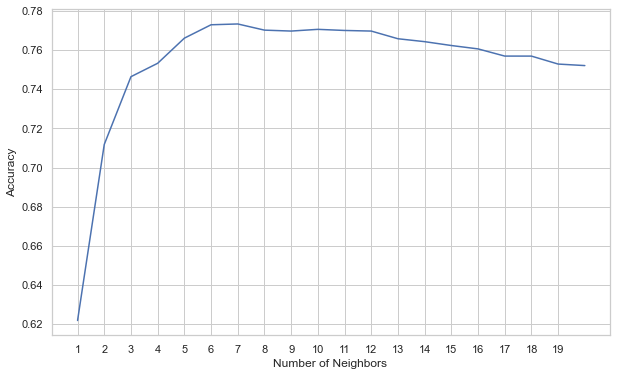

In [123]:
knn_p=KNeighborsRegressor()
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsRegressor(n_neighbors = i).fit(X_train,Y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.r2_score(Y_test, yhat)

loc = np.arange(1,20,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [130]:
knn=KNeighborsRegressor()
para={
        'n_neighbors':[5,6,7],
        'weights':['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute','auto'],
        'leaf_size':[30,40,50],
        'p':[2],
        'metric':['minkowski']
    
}
knn_gs= gs(estimator =knn, param_grid=para,cv=10, n_jobs=5)
knn_gs.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=5,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute',
                                       'auto'],
                         'leaf_size': [30, 40, 50], 'metric': ['minkowski'],
                         'n_neighbors': [5, 6, 7], 'p': [2],
                         'weights': ['uniform', 'distance']})

In [131]:
knn_gs.best_score_

0.7779430860930787

In [132]:
knn_gs.best_estimator_

KNeighborsRegressor(algorithm='brute', n_neighbors=7, weights='distance')

In [133]:
model3=KNeighborsRegressor(algorithm='brute', n_neighbors=7, weights='distance')
model3.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='brute', n_neighbors=7, weights='distance')

In [134]:
scores3 = cross_val_score(model3, X_test, Y_test, scoring='r2', cv=10)
print('Mean R2 Score for KNN Regressor :',mean(scores3),'\nStandard Deviation is : ',std(scores3))

Mean R2 Score for KNN Regressor : 0.6994520009899969 
Standard Deviation is :  0.049012702431380714


In [137]:
dtree = DecisionTreeRegressor()
parameter_dtc_={    
            "splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] 
}
dtcR_gs= gs(estimator =dtree, param_grid=parameter_dtc_,cv=10, n_jobs=5)
dtcR_gs.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=5,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']})

In [138]:
dtcR_gs.best_score_

0.5815242014167775

In [139]:
dtcR_gs.best_estimator_

DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

In [140]:
model4=DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)
model4.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

In [144]:
scores4 = cross_val_score(model4, X_test, Y_test, scoring='r2', cv=10)
print('Mean R2 Score for Decision Tree Regressor :',mean(scores4),'\nStandard Deviation is : ',std(scores4))

Mean R2 Score for Decision Tree Regressor : 0.5674281672577259 
Standard Deviation is :  0.04617981503641636


In [142]:
model5= LinearRegression()
model5.fit(X_train,Y_train)

LinearRegression()

In [145]:
scores5 = cross_val_score(model5, X_test, Y_test, scoring='r2', cv=10)
print('Mean R2 Score for Linear Regression :',mean(scores5),'\nStandard Deviation is : ',std(scores5))

Mean R2 Score for Linear Regression : 0.3104968167809215 
Standard Deviation is :  0.04126615389575756


In [146]:
X_test_predict1= model1.predict(X_test)
X_test_predict2= model2.predict(X_test)
X_test_predict3= model3.predict(X_test)
X_test_predict4= model4.predict(X_test)
X_test_predict5= model5.predict(X_test)

In [153]:
X_test_predict1[0:10]

array([ 4211.83  ,  4216.8813, 11366.552 ,  6704.569 ,  4590.36  ,
        9233.743 ,  3630.3901,  5083.0874, 14144.876 , 15149.34  ],
      dtype=float32)

In [171]:
Y_test[0:10]

8733      4482.0
4819      4107.0
687       8937.0
10603     5636.0
4795      5198.0
4124      6673.0
8843      2754.0
5647      5613.0
4933     14571.0
2534     15147.0
Name: Price, dtype: float64

In [172]:
x=[4482.0,4107.0,8937.0,5636.0,5198.0,6673.0,2754.0,5613.0,14571.0,15147.0]

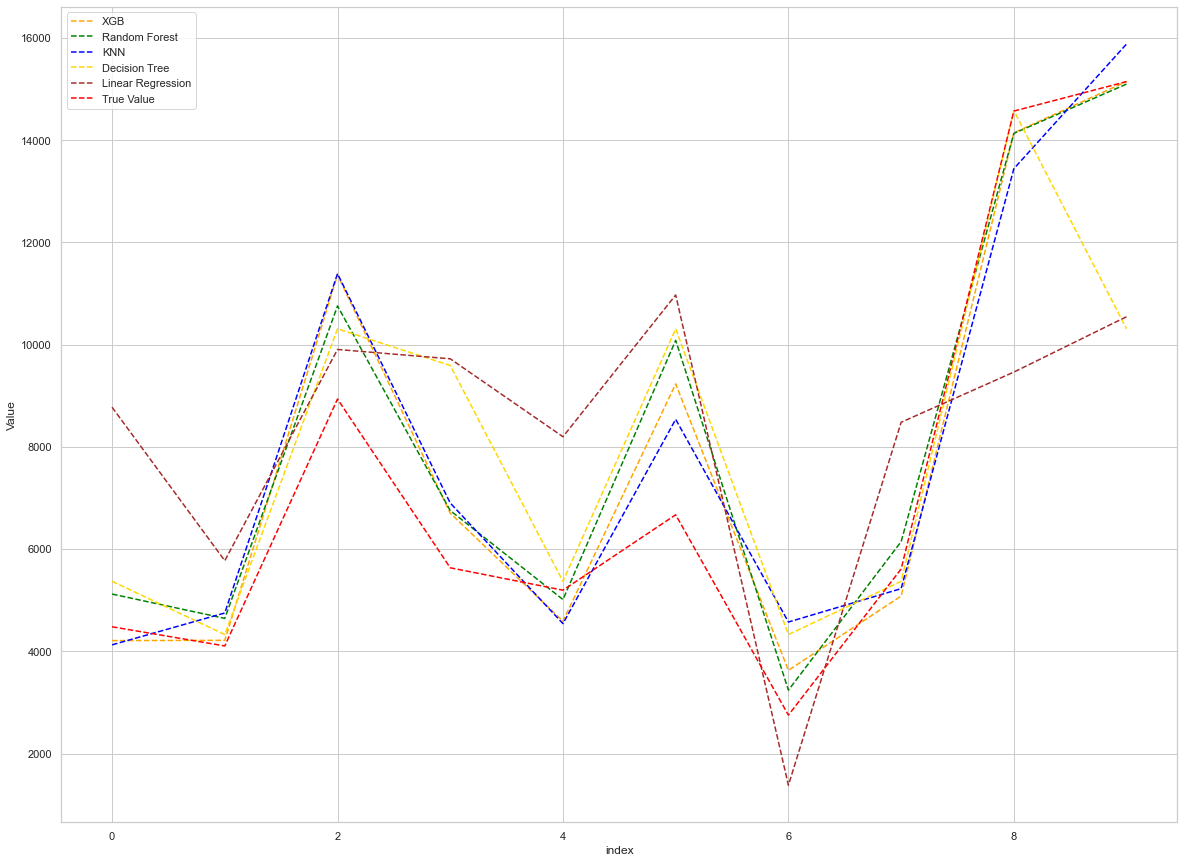

In [173]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)
plt.plot(X_test_predict1[0:10],  linestyle='--',color='orange', label='XGB')
plt.plot(X_test_predict2[0:10],  linestyle='--',color='green', label='Random Forest')
plt.plot(X_test_predict3[0:10],  linestyle='--', color='blue', label='KNN')
plt.plot(X_test_predict4[0:10],  linestyle='--', color='gold', label='Decision Tree')
plt.plot(X_test_predict5[0:10],  linestyle='--', color='brown', label='Linear Regression')
plt.plot(x,  linestyle='--', color='red', label='True Value')

# x label
plt.xlabel('index')
# y label
plt.ylabel('Value')

plt.legend(loc='best')

plt.show();

XGB Regression has better R2 score and less deviation

In [167]:
#saving the model
XGB_Model= pickle.dumps(model1)

In [170]:
prediction=model1.predict(flight_test)